# PRCP-1017-Autopriece Prediction

#### Problem statement:

#### Task 1:- Prepare a complete data analysis report on the given data.

#### Task 2:-Create a predictive model by applying some data science techniques for the price of cars with the available independent variables. That should help the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels.

In [1]:
# lets import the required packages for data reading and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# import and ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# lets read the data

columns=['symboling','normalized_losses','make','fuel_type','aspiration','num_of_doors','body_style','drive_wheels',
         'engine_location','wheel_base','length','width','height','curb_weight','engine_type','num_of_cylinders',
        'engine_size','fuel_system','bore','stroke','compression_rate','horsepower','Peak_rpm','city_mpg',
        'highway_mpg','price']
data=pd.read_csv("auto_imports.csv", names=columns)

In [4]:
# top 5 rows
data.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_rate,horsepower,Peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [5]:
# last 4 rows
data.tail(4)

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_rate,horsepower,Peak_rpm,city_mpg,highway_mpg,price
197,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
198,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
199,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470
200,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


In [6]:
# lets check info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized_losses  201 non-null    object 
 2   make               201 non-null    object 
 3   fuel_type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num_of_doors       201 non-null    object 
 6   body_style         201 non-null    object 
 7   drive_wheels       201 non-null    object 
 8   engine_location    201 non-null    object 
 9   wheel_base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb_weight        201 non-null    int64  
 14  engine_type        201 non-null    object 
 15  num_of_cylinders   201 non-null    object 
 16  engine_size        201 non

* there are no null values in the dataset, there are 15 objective type features and 11 numerical features(6-int and 5-float)

In [7]:
# lets ceck data distribution of Numerical features
data.describe()

,symboling,wheel_base,length,width,height,curb_weight,engine_size,compression_rate,city_mpg,highway_mpg,price
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,10.164279,25.179104,30.686567,13207.129353
std,1.254802,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,4.004965,6.423220,6.815150,7947.066342
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,8.600000,19.000000,25.000000,7775.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,9.400000,30.000000,34.000000,16500.000000
max,3.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000,45400.000000


In [8]:
# lets ceck data distribution of objective type features
data.describe(include='object')

,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,engine_type,num_of_cylinders,fuel_system,bore,stroke,horsepower,Peak_rpm
count,201,201,201,201,201,201,201,201,201,201,201,201,201,201,201
unique,52,22,2,2,3,5,3,2,6,7,8,39,37,59,23
top,?,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi,3.62,3.40,68,5500
freq,37,32,181,165,113,94,118,198,145,157,92,23,19,19,36


* there are few columns have numerical values but in objective type those are normalized-losses,bore, stroke,horsepower,peak_rpm

In [9]:
# lets check unique count of normalized-losses
data['normalized_losses'].unique()

array(['?', '164', '158', '192', '188', '121', '98', '81', '118', '148',
       '110', '145', '137', '101', '78', '106', '85', '107', '104', '113',
       '150', '129', '115', '93', '142', '161', '153', '125', '128',
       '122', '103', '168', '108', '194', '231', '119', '154', '74',
       '186', '83', '102', '89', '87', '77', '91', '134', '65', '197',
       '90', '94', '256', '95'], dtype=object)

In [10]:
data['bore'].unique()

array(['3.47', '2.68', '3.19', '3.13', '3.50', '3.31', '3.62', '2.91',
       '3.03', '2.97', '3.34', '3.60', '2.92', '3.15', '3.43', '3.63',
       '3.54', '3.08', '?', '3.39', '3.76', '3.58', '3.46', '3.80',
       '3.78', '3.17', '3.35', '3.59', '2.99', '3.33', '3.70', '3.61',
       '3.94', '3.74', '2.54', '3.05', '3.27', '3.24', '3.01'],
      dtype=object)

In [11]:
data['stroke'].unique()

array(['2.68', '3.47', '3.40', '2.80', '3.19', '3.39', '3.03', '3.11',
       '3.23', '3.46', '3.90', '3.41', '3.07', '3.58', '4.17', '2.76',
       '3.15', '?', '3.16', '3.64', '3.10', '3.35', '3.12', '3.86',
       '3.29', '3.27', '3.52', '2.19', '3.21', '2.90', '2.07', '2.36',
       '2.64', '3.08', '3.50', '3.54', '2.87'], dtype=object)

In [12]:
data['horsepower'].unique()

array(['111', '154', '102', '115', '110', '140', '101', '121', '182',
       '48', '70', '68', '88', '145', '58', '76', '60', '86', '100', '78',
       '90', '176', '262', '135', '84', '64', '120', '72', '123', '155',
       '184', '175', '116', '69', '55', '97', '152', '160', '200', '95',
       '142', '143', '207', '?', '73', '82', '94', '62', '56', '112',
       '92', '161', '156', '52', '85', '114', '162', '134', '106'],
      dtype=object)

In [13]:
data['Peak_rpm'].unique()

array(['5000', '5500', '5800', '4250', '5400', '5100', '4800', '6000',
       '4750', '4650', '4200', '4350', '4500', '5200', '4150', '5600',
       '5900', '?', '5250', '4900', '4400', '6600', '5300'], dtype=object)

* normalized-losses,bore, stroke,horsepower,peak_rpm thses fatures have few missing attributes classifed as '?', so we have to treat those attributes

# EDA

### Univariate Analysis

In [14]:
# check the distribution of indipendent variables

# lets import the sweetviz
import sweetviz as sv
report=sv.analyze(data)
report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


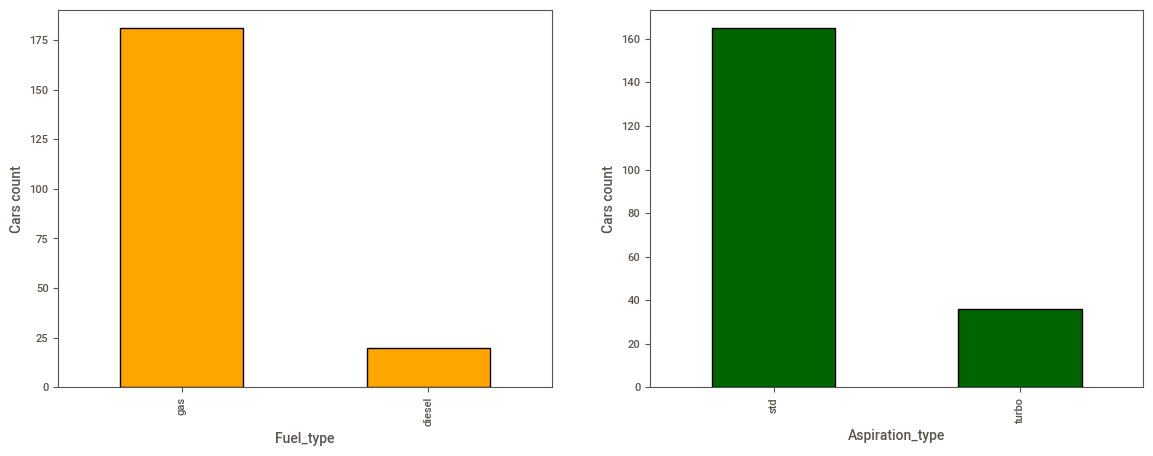

In [15]:
# lets check the fuel make of the cars
plt.figure(figsize=(14,5))
ax=plt.subplot(1,2,1)
data['fuel_type'].value_counts().plot(kind='bar', color='orange',edgecolor='black')
plt.xlabel("Fuel_type")
plt.ylabel("Cars count")

# lets check the fuel make of the cars
ax=plt.subplot(1,2,2)
data['aspiration'].value_counts().plot(kind='bar', color='darkgreen',edgecolor='black')
plt.xlabel("Aspiration_type")
plt.ylabel("Cars count")
plt.show()

* 90% of vehicles are Gas type and only 10% vehicles are diesel type
* 82% vehicles are Std_aspirated engines and only 18% are turbo aspirated engines.

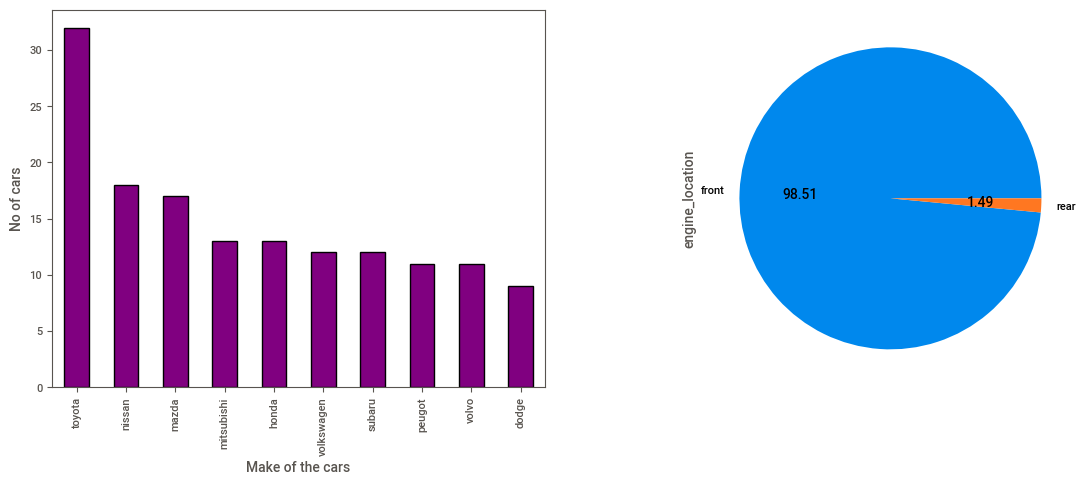

In [16]:

plt.figure(figsize=(14,5))
# lets check the top 10 highest car making companies
ax=plt.subplot(1,2,1)
data['make'].value_counts().nlargest(10).plot(kind='bar', color='purple', edgecolor='black')
plt.xlabel("Make of the cars")
plt.ylabel("No of cars")

# lets plot pie plot for engine type
ax=plt.subplot(1,2,2)
data['engine_location'].value_counts().plot(kind='pie', autopct='%.2f')

plt.show()

* toyoa is the largest car making brand
* almost all vehicles are frount engine only with 99% share

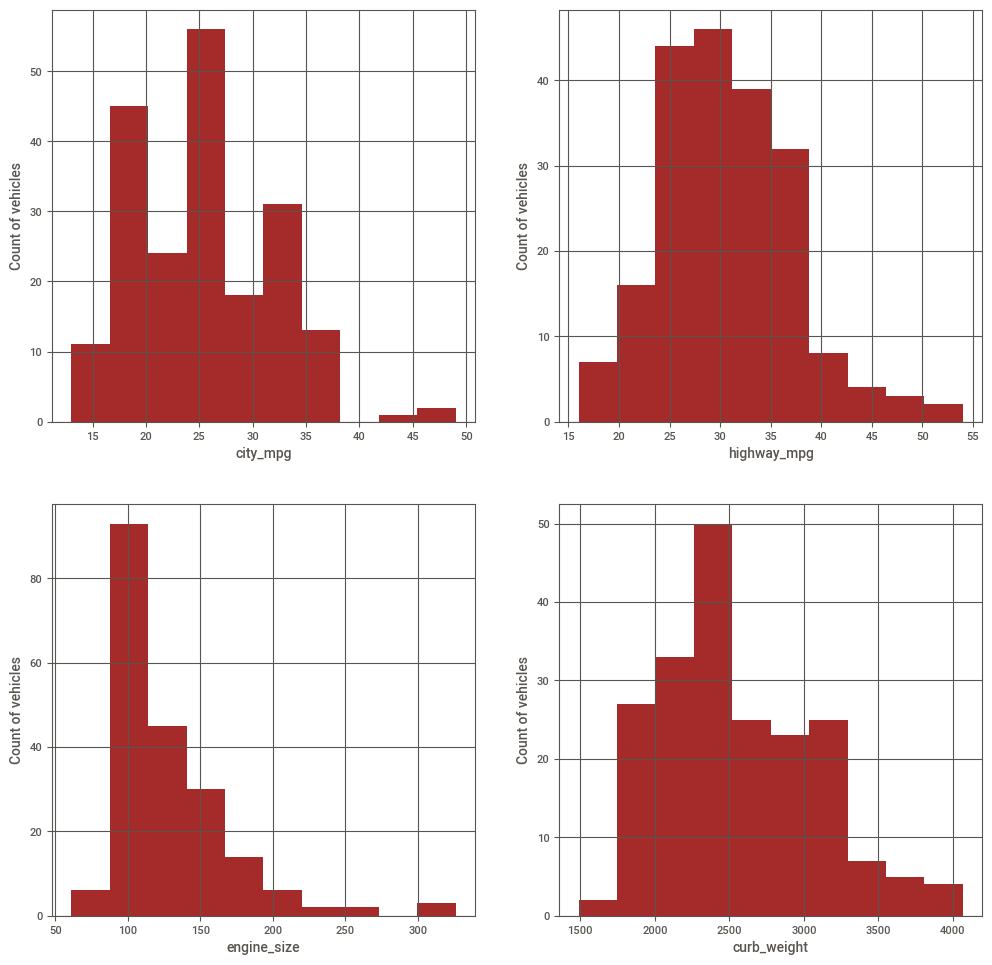

In [17]:
continuous_features=['city_mpg','highway_mpg','engine_size','curb_weight']
plt.figure(figsize=(12,12))
plt_num=1
for cl in continuous_features:
    ax=plt.subplot(2,2, plt_num)
    data[cl].hist(color='brown')
    plt.xlabel(cl)
    plt.ylabel('Count of vehicles')
    plt_num += 1
plt.show()

### Insight/observations from Univariate Analysis

* 90% of vehicles are Gas type and only 10% vehicles are diesel type
* 82% vehicles are Std_aspirated engines and only 18% are turbo aspirated engines.
* toyoa is the largest cars making company
* almost all vehicles are frount engine only with 99% share
* most of the cars are medium safe rated with 0 & 1 symboling score. 
* almost all vehicles are frount engine only with 99% of total share
* 47% of vehicles having sedan body_style
* 4 door and 2 door vehicles, almost have equl share
* 59% vehicles are front wheel drive , 37% are rear wheel drive type and very  less number of cars are four wheel drive
* 72% vehicles are 'Overhead_camshaft' engine vehicles
* 4 cylinder vehicles take more share with 78% and then 6 cylinder vehicels have 12%
* multi point fuel injection(mpfi) vehcles are more with 46% and then 2 barrel with 32%


### Bi-Variate analysis

In [18]:
# lets split entire features into two parts

Con_var=['normalized_losses','bore', 'stroke', 'horsepower', 'Peak_rpm', 'wheel_base', 'length', 'width', 'height',
         'curb_weight', 'engine_size', 'compression_rate', 'city_mpg', 'highway_mpg']
cat_var=['symboling','fuel_type','aspiration','num_of_doors','body_style','drive_wheels',
         'engine_location','engine_type','num_of_cylinders','fuel_system']

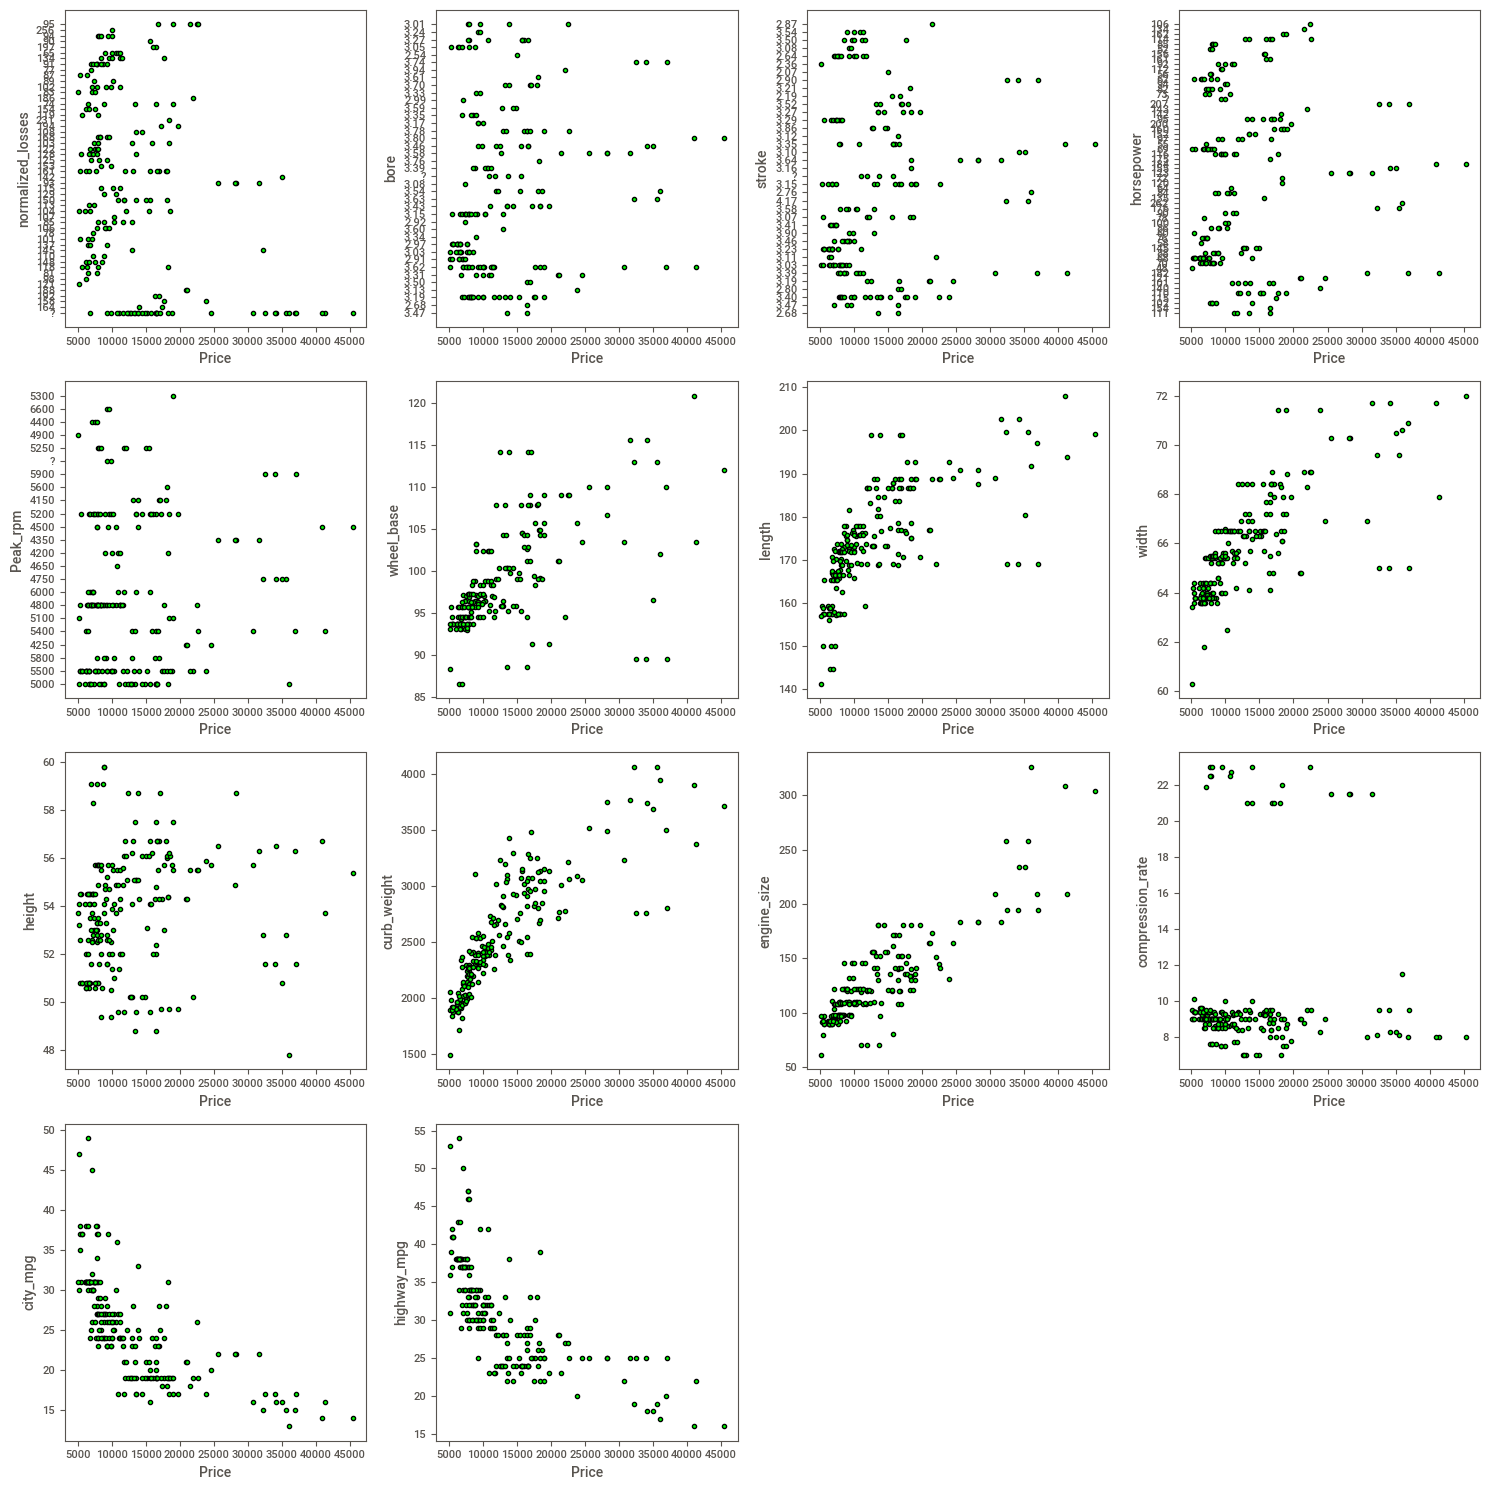

In [19]:
# lets plot scatterplot between indiependent(continuous) variables and dependent variable
plt.figure(figsize=(15,15))
plt_num=1

for col in Con_var:
    ax=plt.subplot(4,4, plt_num)
    plt.scatter( y=data[col], x=data['price'], c='lime',edgecolor='black')
    plt.xlabel('Price')
    plt.ylabel(col)
    plt_num += 1

plt.tight_layout()
plt.show()

* length & width of the vehicles have somewhat positive relation with price
* if curb_weight raises price also increasing
* engine_size have direct postive relation with price( if engine_size increases price increases)
* if city_mpg and highway_mpg reducing corresponding vehicle price increasing

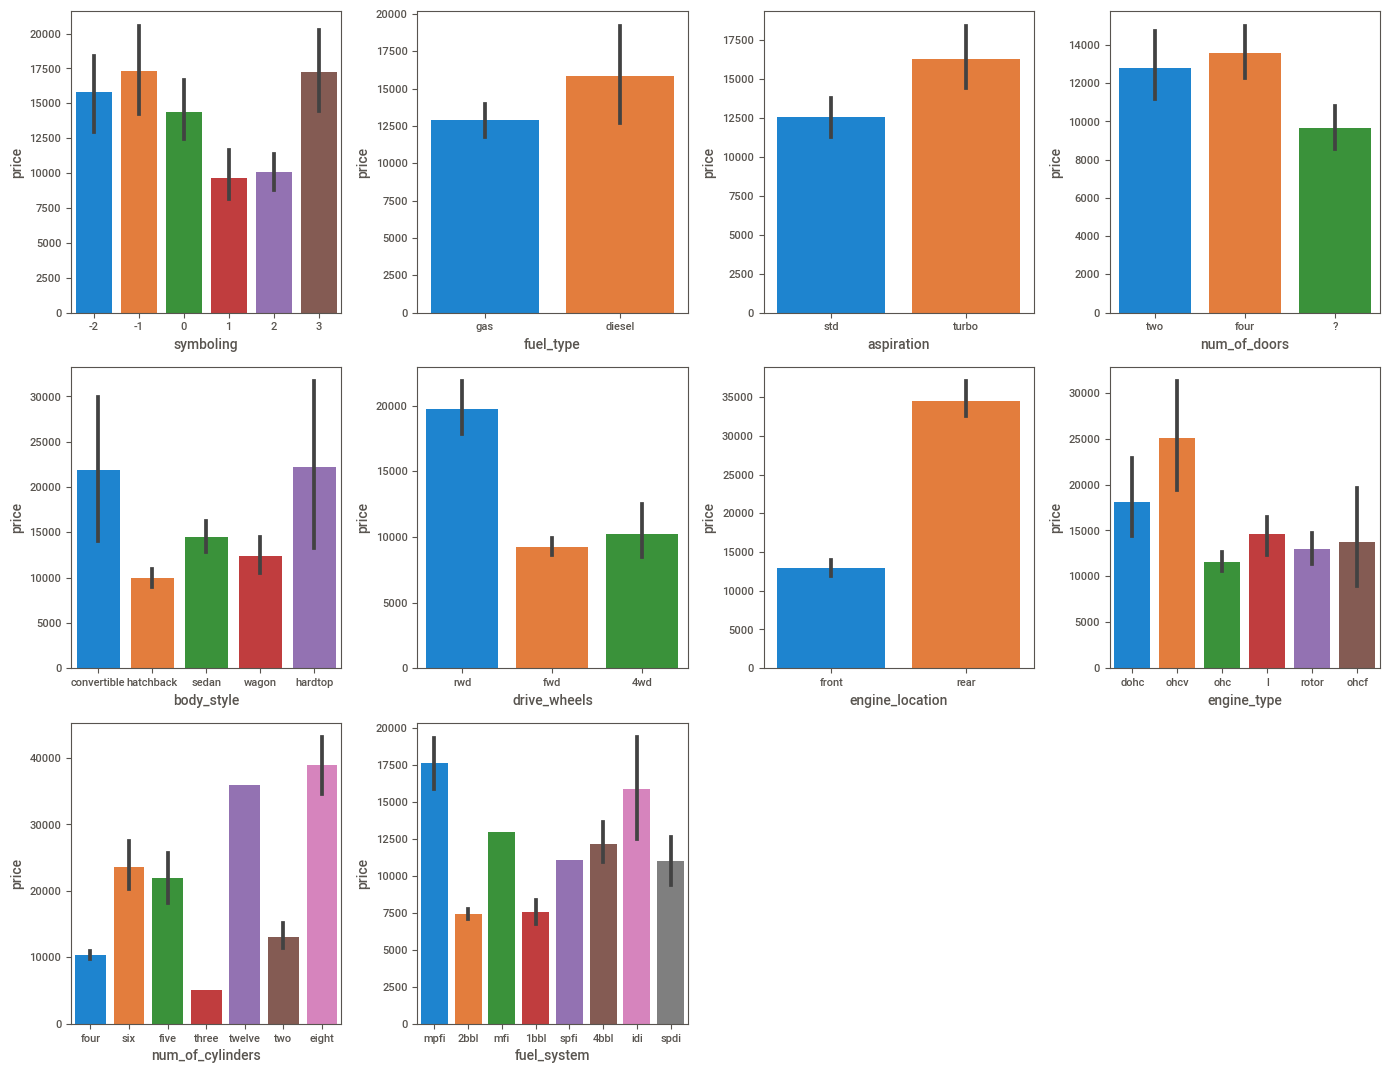

In [20]:
# lets plot couterplot between independent(categorical) variables and dependent varaible to get the relation

plt.figure(figsize=(14,14))
plt_num =1

for col in cat_var:
    ax=plt.subplot(4,4, plt_num)
    sns.barplot( data[col], data['price'])
    plt.xlabel(col)
    plt.ylabel('price')
    plt_num += 1

plt.tight_layout()
plt.show()

* though diesel vehicels are 10% , the average cost of diesel vehicles are more than gas vehicles, so cost of diesel vehicles are higher than gas vehicels
* Price of Turbo_aspiration engine vehicleas are higher than std aspiration_engine vehilcles
* hardtop & convertable body_style vehicle price is high and hatchback type vehicle price lesser
* cost of rear wheel drive vehicle are almost double the price of front wheel dive vehicles
* cost of rear engine vehicles are double than the price of frount engine vehicles
* ohc engine vehicles are cheaper thar other engine type vehicels
* if number of cylinders are more price is also high

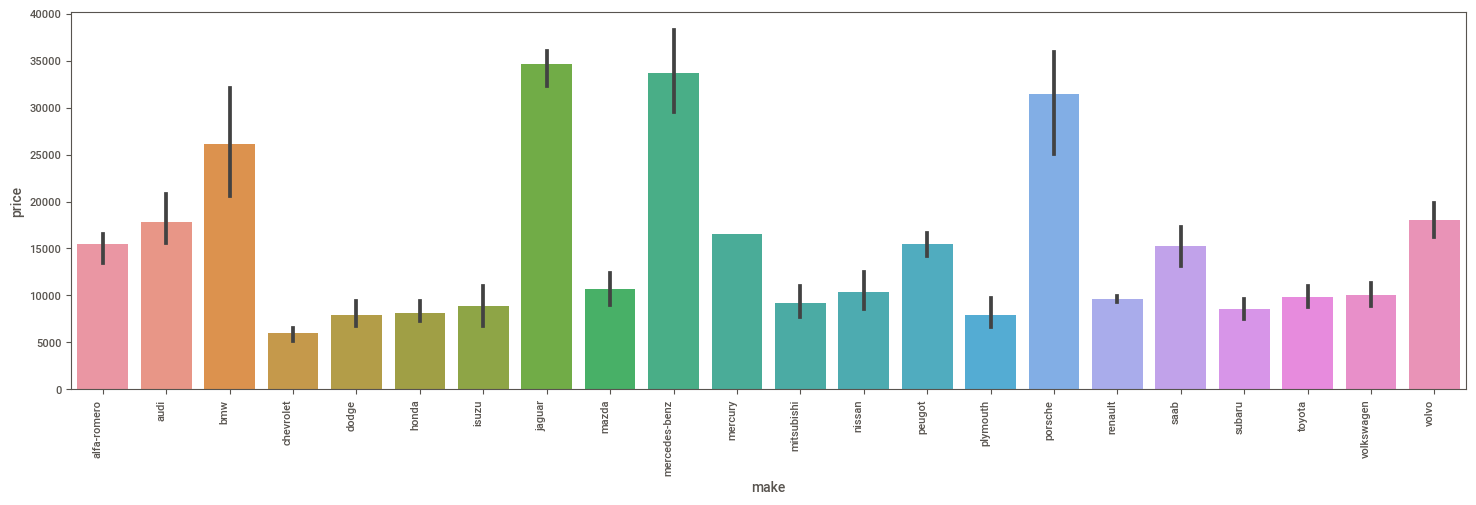

In [21]:
# lets check the price distribution agains each category of 'Make'
plt.figure(figsize=(18,5))
sns.barplot(data['make'], data['price'])
plt.xticks(rotation=90, ha='right')
plt.show()

### Insights/observations from Bi-Variate analysis

* top-3 highest priced cars are 'jaguar',mercedes-benz' and 'porche' and lowest priced car is 'chevrolet
* though diesel vehicels are 10% , the average cost of diesel vehicles are more than gas vehicles, so cost of diesel vehicles are higher than gas vehicels
* Price of Turbo_aspiration engine vehicleas are higher than std aspiration_engine vehilcles
* hardtop & convertable body_style vehicle price is high and hatchback type vehicle price lesser
* cost of rear wheel drive vehicle are almost double the price of front wheel dive vehicles
* cost of rear engine vehicles are double than the price of frount engine vehicles
* ohc engine vehicles are cheaper thar other engine type vehicels
* if number of cylinders are more price is also high

### Multi_variate Analysis

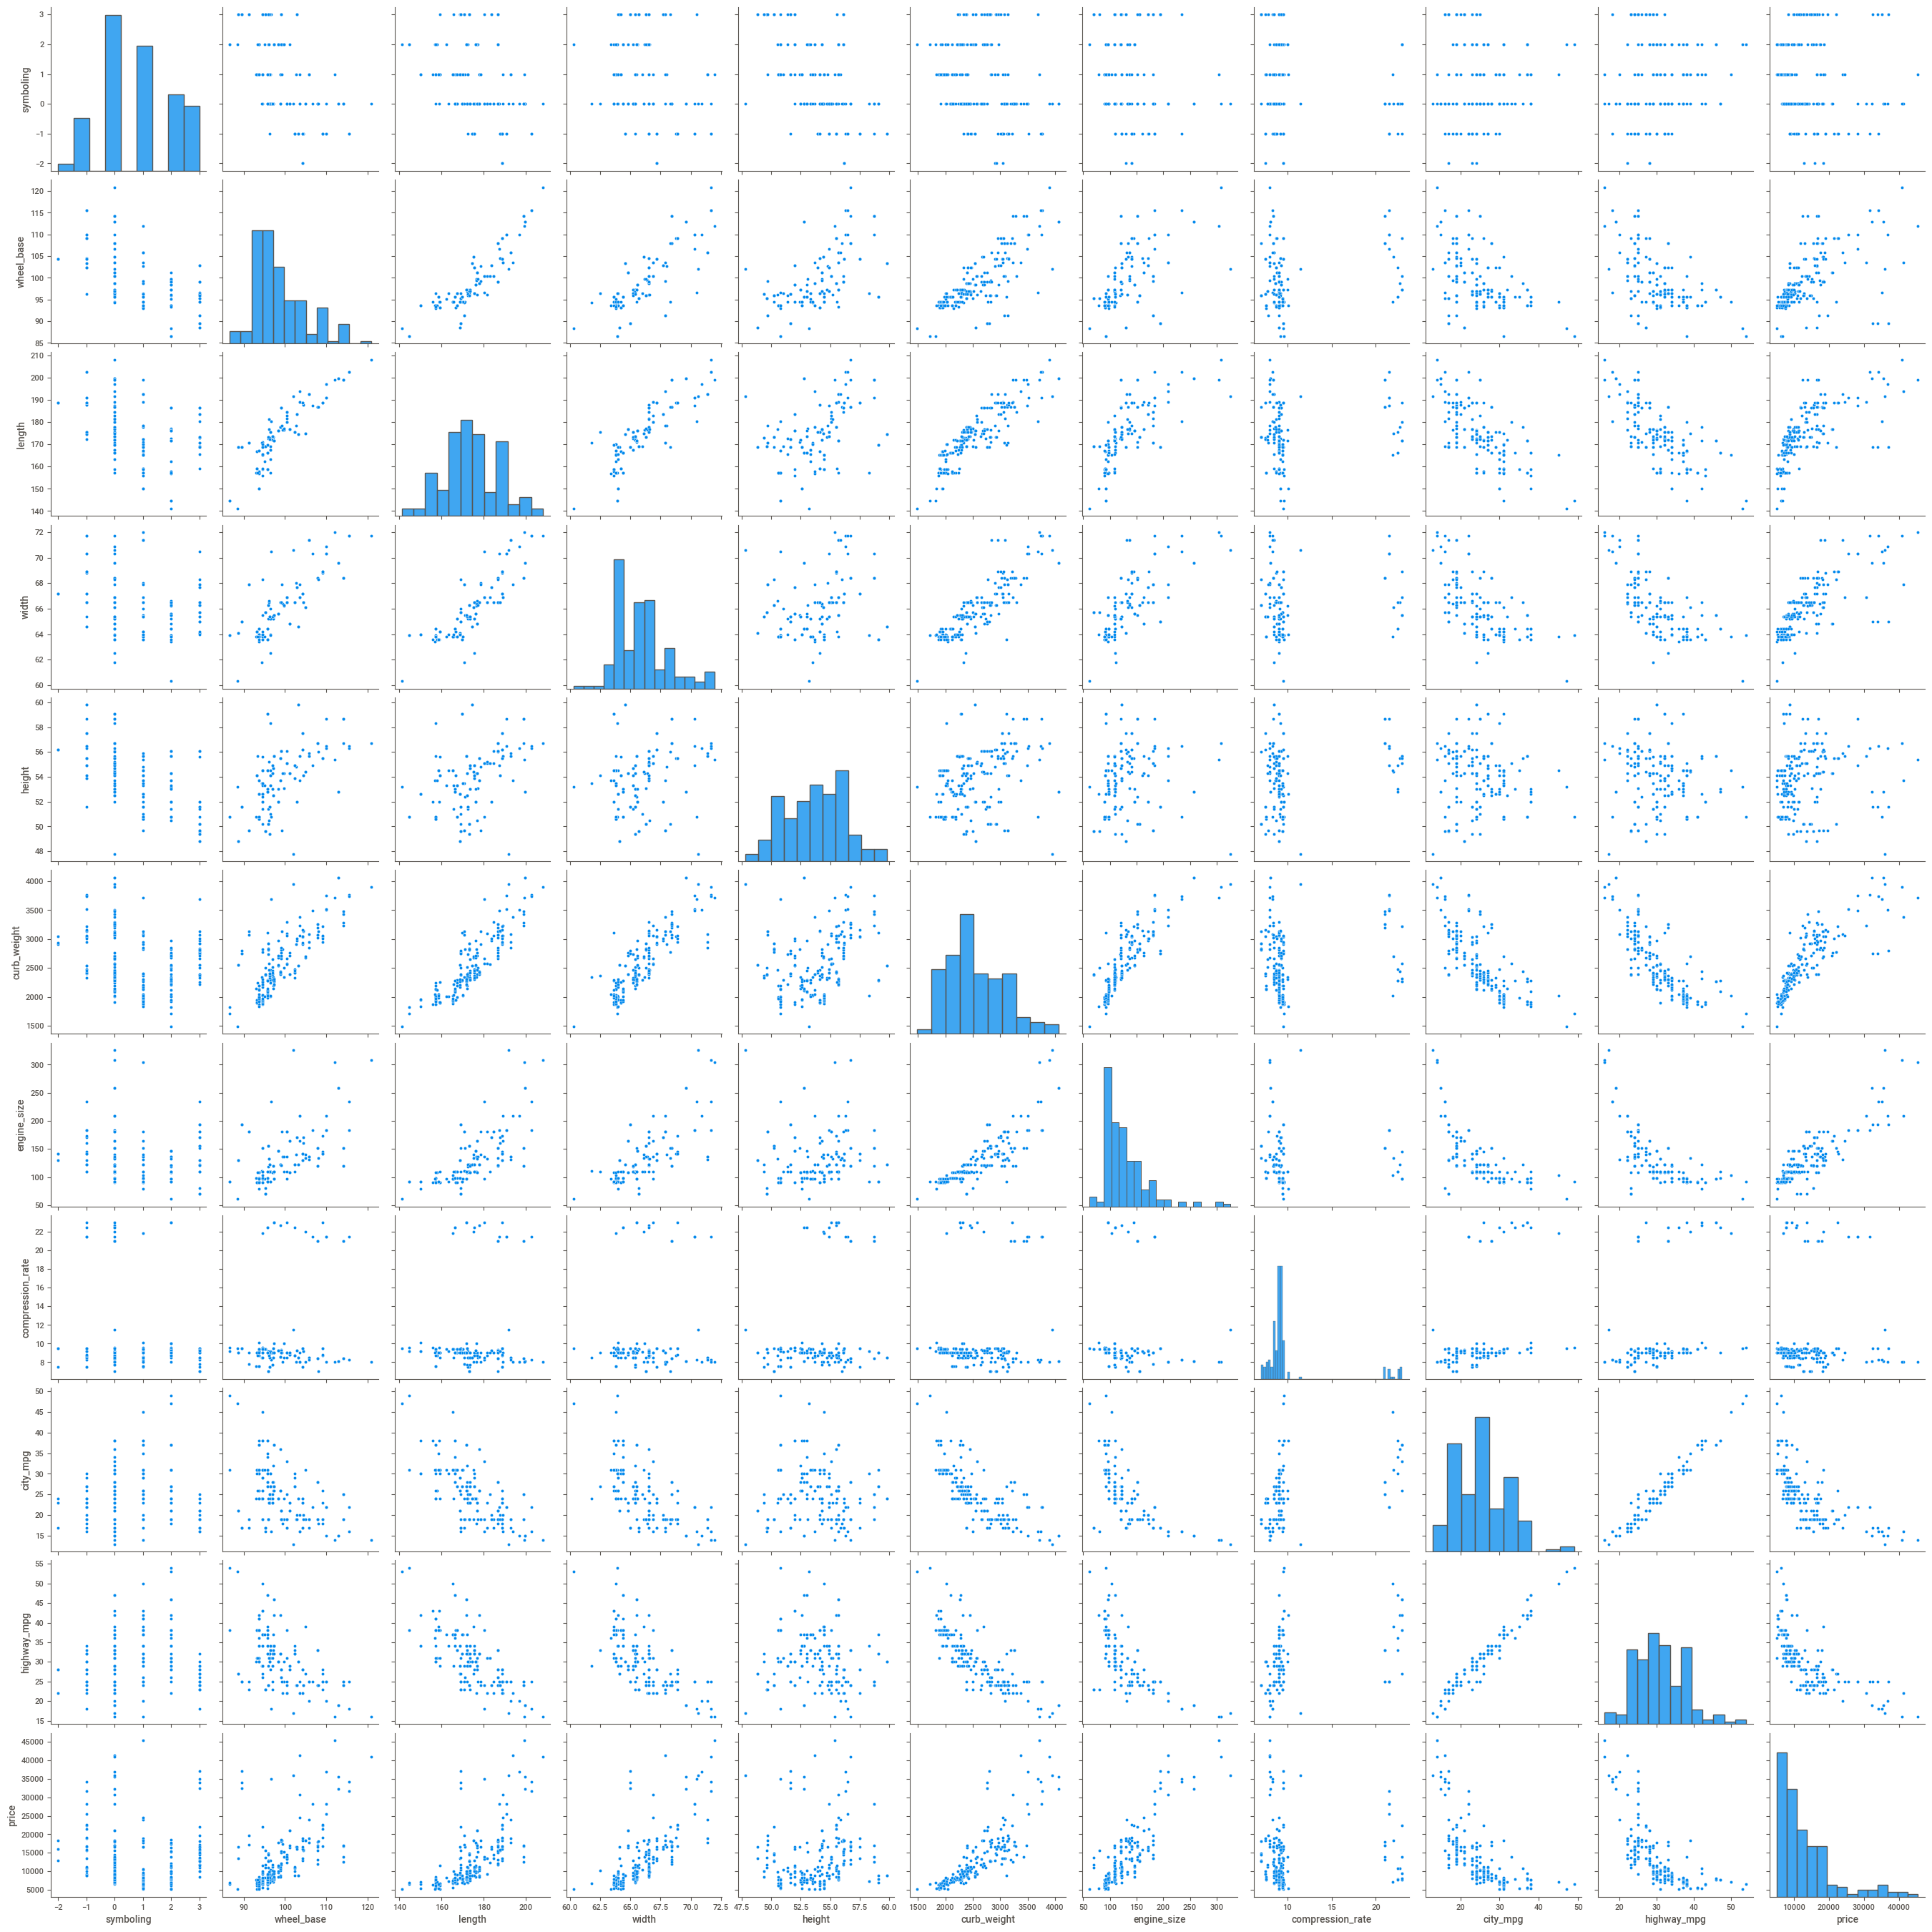

In [22]:
sns.pairplot(data)

##### * city_mpg & highway_mpg are highly positive correlated (97%)
##### Wheel_base:
* wheel base have 87% positive correlation with  length and 81% positive correlation with width and 78% +ve correlation with curb_weight of vehicle
* wheel base is having 50% negetive correlation with the milageper_gallon(mpg)
##### length:
* length and width are 85% +ve correlated and length and curb_weight is having 88% +ve correlation
* length is almost 70% -ve correlated with milageper_gallon(mpg)
##### width:
* width and curb weight also highly correlated (86% +ve)
* city_mpg and highway_mpg is 65% positively correlated with width
##### curb_weight:
* curb_weight and engine size 84% positively correlated
* curb_weight is 75% +vely correlated with city_mpg and highway_mpg


# Data Preprocessing

### Missing/Null values imputing

In [23]:
# lets check if null values present in the data
data.isnull().sum()

symboling            0
normalized_losses    0
make                 0
fuel_type            0
aspiration           0
num_of_doors         0
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_of_cylinders     0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_rate     0
horsepower           0
Peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

* there are no  null values present in the data

###### though there are no null values present  in the data,  there are few attributes classifed as '?' in 'normalized-losses','bore', 'stroke','horsepower','peak_rpm', 'no_of_doors' independent features. SO lets treat them

##### normalized_losses- imputing

In [24]:
# lets treat '?' values in the 'normalized_losses'
print(data.loc[data['normalized_losses'] != '?', 'normalized_losses'].astype('int').mean())
print(data.loc[data['normalized_losses'] != '?', 'normalized_losses'].astype('int').median())
print(data.loc[data['normalized_losses'] != '?', 'normalized_losses'].astype('int').mode())

122.0
115.0
0    161
Name: normalized_losses, dtype: int32


In [25]:
# as data is not noramlly distributed i would like to impute it with 'median' values
Nr_med=data.loc[data['normalized_losses'] != '?', 'normalized_losses'].astype('int').median()
data.loc[data['normalized_losses'] == '?','normalized_losses']= Nr_med

In [26]:
# lets type cast 'object' type to 'int' type
data['normalized_losses']=data['normalized_losses'].astype('int')

##### stroke- imputing

In [27]:
# lets treat '?' values in the 'stroke'
print(data.loc[data['stroke'] != '?', 'stroke'].astype('float').mean())
print(data.loc[data['stroke'] != '?', 'stroke'].astype('float').median())
print(data.loc[data['stroke'] != '?', 'stroke'].astype('float').mode())

3.2569035532994857
3.29
0    3.4
Name: stroke, dtype: float64


In [28]:
# as data is not noramlly distributed i would like to impute it with 'median' values
st_med=data.loc[data['stroke'] != '?', 'stroke'].astype('float').median()
data.loc[data['stroke'] == '?','stroke']= st_med

# lets type cast 'object' type to 'float' type
data['stroke']=data['stroke'].astype('float')

##### bore- imputing

In [29]:
# lets treat '?' values in the 'bore'
print(data.loc[data['bore'] != '?', 'bore'].astype('float').mean())
print(data.loc[data['bore'] != '?', 'bore'].astype('float').median())
print(data.loc[data['bore'] != '?', 'bore'].astype('float').mode())

3.3307106598984775
3.31
0    3.62
Name: bore, dtype: float64


In [30]:
# as data is not noramlly distributed i would like to impute it with 'median' values
bore_med=data.loc[data['bore'] != '?', 'bore'].astype('float').median()
data.loc[data['bore'] == '?','bore']= bore_med

# lets type cast 'object' type to 'float' type
data['bore']=data['bore'].astype('float')

##### horsepower : imputing

In [31]:
# lets treat '?' values in the 'bore'
print(data.loc[data['horsepower'] != '?', 'horsepower'].astype('int').mean())
print(data.loc[data['horsepower'] != '?', 'horsepower'].astype('int').median())
print(data.loc[data['horsepower'] != '?', 'horsepower'].astype('int').mode())

103.39698492462311
95.0
0    68
Name: horsepower, dtype: int32


In [32]:
# as data is not noramlly distributed i would like to impute it with 'median' values
hp_med=data.loc[data['horsepower'] != '?', 'horsepower'].astype('int').median()
data.loc[data['horsepower'] == '?','horsepower']= hp_med

# lets type cast 'object' type to 'int' type
data['horsepower']=data['horsepower'].astype('int')

##### peak_rpm : data cleaning(imputing)

In [33]:
# lets treat '?' values in the 'bore'
print(data.loc[data['Peak_rpm'] != '?', 'Peak_rpm'].astype('int').mean())
print(data.loc[data['Peak_rpm'] != '?', 'Peak_rpm'].astype('int').median())
print(data.loc[data['Peak_rpm'] != '?', 'Peak_rpm'].astype('int').mode())

5117.587939698493
5200.0
0    4800
1    5500
Name: Peak_rpm, dtype: int32


In [34]:
# as data is not noramlly distributed i would like to impute it with 'median' values
peak_med=data.loc[data['Peak_rpm'] != '?', 'Peak_rpm'].astype('int').median()
data.loc[data['Peak_rpm'] == '?','Peak_rpm']= peak_med

# lets type cast 'object' type to 'int' type
data['Peak_rpm']=data['Peak_rpm'].astype('int')

##### num_of_doors: imputing the missing(?) values

In [35]:
# lets check unique values count in num_of_doors
data['num_of_doors'].value_counts()

four    113
two      86
?         2
Name: num_of_doors, dtype: int64

In [36]:
# lets replace "?" with four
data.loc[data['num_of_doors'] == '?','num_of_doors'] = 'four'

In [37]:
data.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_rate,horsepower,Peak_rpm,city_mpg,highway_mpg,price
0,3,115,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,115,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,115,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [38]:
data.describe()

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_rate,horsepower,Peak_rpm,city_mpg,highway_mpg,price
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,120.711443,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,3.330299,3.257562,10.164279,103.313433,5118.407960,25.179104,30.686567,13207.129353
std,1.254802,32.111623,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,0.268088,0.316082,4.004965,37.374942,478.183493,6.423220,6.815150,7947.066342
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,137.000000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


In [39]:
data.describe(include='object')

,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,engine_type,num_of_cylinders,fuel_system
count,201,201,201,201,201,201,201,201,201,201
unique,22,2,2,2,5,3,2,6,7,8
top,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,32,181,165,115,94,118,198,145,157,92


# Categorical data encoding

#### 'make'- Nominal_categorical feature encoding using "Count of frequency encoding"

##### tried with other encoding techniques but 'count of frequency encoding' has given best results for the algorithms

In [40]:
# lets create a dictionary with vehicle make and its count
make_encod=data['make'].value_counts().to_dict()

In [41]:
# lets replace make with its count using mapping
data['make']=data['make'].map(make_encod)

In [42]:
data.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_rate,horsepower,Peak_rpm,city_mpg,highway_mpg,price
0,3,115,3,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,115,3,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,115,3,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,6,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,6,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


##### "fuel_type" encoding using ordinal_encoding, highest freqent category with highest priority

In [43]:
# lets check which category has appeared most frequently
data['fuel_type'].value_counts()

gas       181
diesel     20
Name: fuel_type, dtype: int64

In [44]:
# will replace gas with 1 and 'diesel' with 0
fuel={'gas':1, 'diesel':0}
data['fuel_type']=data['fuel_type'].map(fuel)

In [45]:
data.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_rate,horsepower,Peak_rpm,city_mpg,highway_mpg,price
0,3,115,3,1,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,115,3,1,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,115,3,1,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,6,1,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,6,1,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


##### "aspiration" encoding using ordinal_encoding, highest freqent category with highest priority

In [46]:
# lets check which category has appeared most frequently
data['aspiration'].value_counts()

std      165
turbo     36
Name: aspiration, dtype: int64

In [47]:
# will replace std with 1 and 'turbo' with 0
asp={'std':1, 'turbo':0}
data['aspiration']=data['aspiration'].map(asp) 

In [48]:
data.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_rate,horsepower,Peak_rpm,city_mpg,highway_mpg,price
0,3,115,3,1,1,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,115,3,1,1,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,115,3,1,1,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,6,1,1,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,6,1,1,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


##### "Num_of_doors" encoding using ordinal_encoding, highest freqent category with highest priority

In [49]:
# lets check which category has appeared most frequently
data['num_of_doors'].value_counts()

four    115
two      86
Name: num_of_doors, dtype: int64

In [50]:
# will replace 'four' with 1 and 'two' with 0
data['num_of_doors']=data['num_of_doors'].replace({'four':1,'two':0})

In [51]:
data.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_rate,horsepower,Peak_rpm,city_mpg,highway_mpg,price
0,3,115,3,1,1,0,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,115,3,1,1,0,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,115,3,1,1,0,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,6,1,1,1,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,6,1,1,1,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


#### 'body_style' feature encoding using ordianl encoding

In [52]:
# lets check the count of frequency of each category
data['body_style'].value_counts()

sedan          94
hatchback      68
wagon          25
hardtop         8
convertible     6
Name: body_style, dtype: int64

In [53]:
# will replace based on most frequent appeared will be highest prioritised
body={'sedan':5,'hatchback':4,'wagon':3,'hardtop':2,'convertible':1}
data['body_style']=data['body_style'].map(body)

In [54]:
data.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_rate,horsepower,Peak_rpm,city_mpg,highway_mpg,price
0,3,115,3,1,1,0,1,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,115,3,1,1,0,1,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,115,3,1,1,0,4,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,6,1,1,1,5,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,6,1,1,1,5,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


##### "drive_wheels" feature encoding

In [55]:
# lets check the count of frequency of each category
data['drive_wheels'].value_counts()

fwd    118
rwd     75
4wd      8
Name: drive_wheels, dtype: int64

In [56]:
# will replace based on most frequent appeared will be highest prioritised

data['drive_wheels']=data['drive_wheels'].replace({'fwd':3,'rwd':2,'4wd':1})

In [57]:
data.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_rate,horsepower,Peak_rpm,city_mpg,highway_mpg,price
0,3,115,3,1,1,0,1,2,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,115,3,1,1,0,1,2,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,115,3,1,1,0,4,2,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,6,1,1,1,5,3,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,6,1,1,1,5,1,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


##### 'engine_location' feature labels encoding

In [58]:
# lets check the count of frequency of each category
data['engine_location'].value_counts()

front    198
rear       3
Name: engine_location, dtype: int64

In [59]:
# will replace 'front' with 1 and 'rear' with 0

data['engine_location']=data['engine_location'].replace({'front':1,'rear':0})

##### "engine_type" independent varibel encoding

In [60]:
# lets check the count of frequency of each category
data['engine_type'].value_counts()

ohc      145
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
Name: engine_type, dtype: int64

In [61]:
# lets replace with using ordinal encoding
en_t={'ohc':6,'ohcf':5,'ohcv':4,'dohc':3,'l':2,'rotor':1}
data['engine_type']=data['engine_type'].map(en_t)

##### lets encode 'num_of_cylinders' feature's categories

In [62]:
# lets check the count of frequency of each category
data['num_of_cylinders'].value_counts()

four      157
six        24
five       10
two         4
eight       4
three       1
twelve      1
Name: num_of_cylinders, dtype: int64

In [63]:
# lets replace with using ordinal encoding
num_cy={'four':6,'six':5,'five':4,'two':3,'eight':2,'three':1,'twelve':0}
data['num_of_cylinders']=data['num_of_cylinders'].map(num_cy)

###### 'fuel_system" categorical data encoding

In [64]:
# lets check the count of frequency of each category
data['fuel_system'].value_counts()

mpfi    92
2bbl    64
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuel_system, dtype: int64

In [65]:
# lets replace with using ordinal encoding
fl_sy={'mpfi':8,'2bbl':7,'idi':6,'1bbl':5,'spdi':4,'4bbl':3,'mfi':2,'spfi':1}
data['fuel_system']=data['fuel_system'].map(fl_sy)

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized_losses  201 non-null    int32  
 2   make               201 non-null    int64  
 3   fuel_type          201 non-null    int64  
 4   aspiration         201 non-null    int64  
 5   num_of_doors       201 non-null    int64  
 6   body_style         201 non-null    int64  
 7   drive_wheels       201 non-null    int64  
 8   engine_location    201 non-null    int64  
 9   wheel_base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb_weight        201 non-null    int64  
 14  engine_type        201 non-null    int64  
 15  num_of_cylinders   201 non-null    int64  
 16  engine_size        201 non

## Checking and treating Outliers

#### tried treating the Outlierws but Model has performed better without treating outliers only

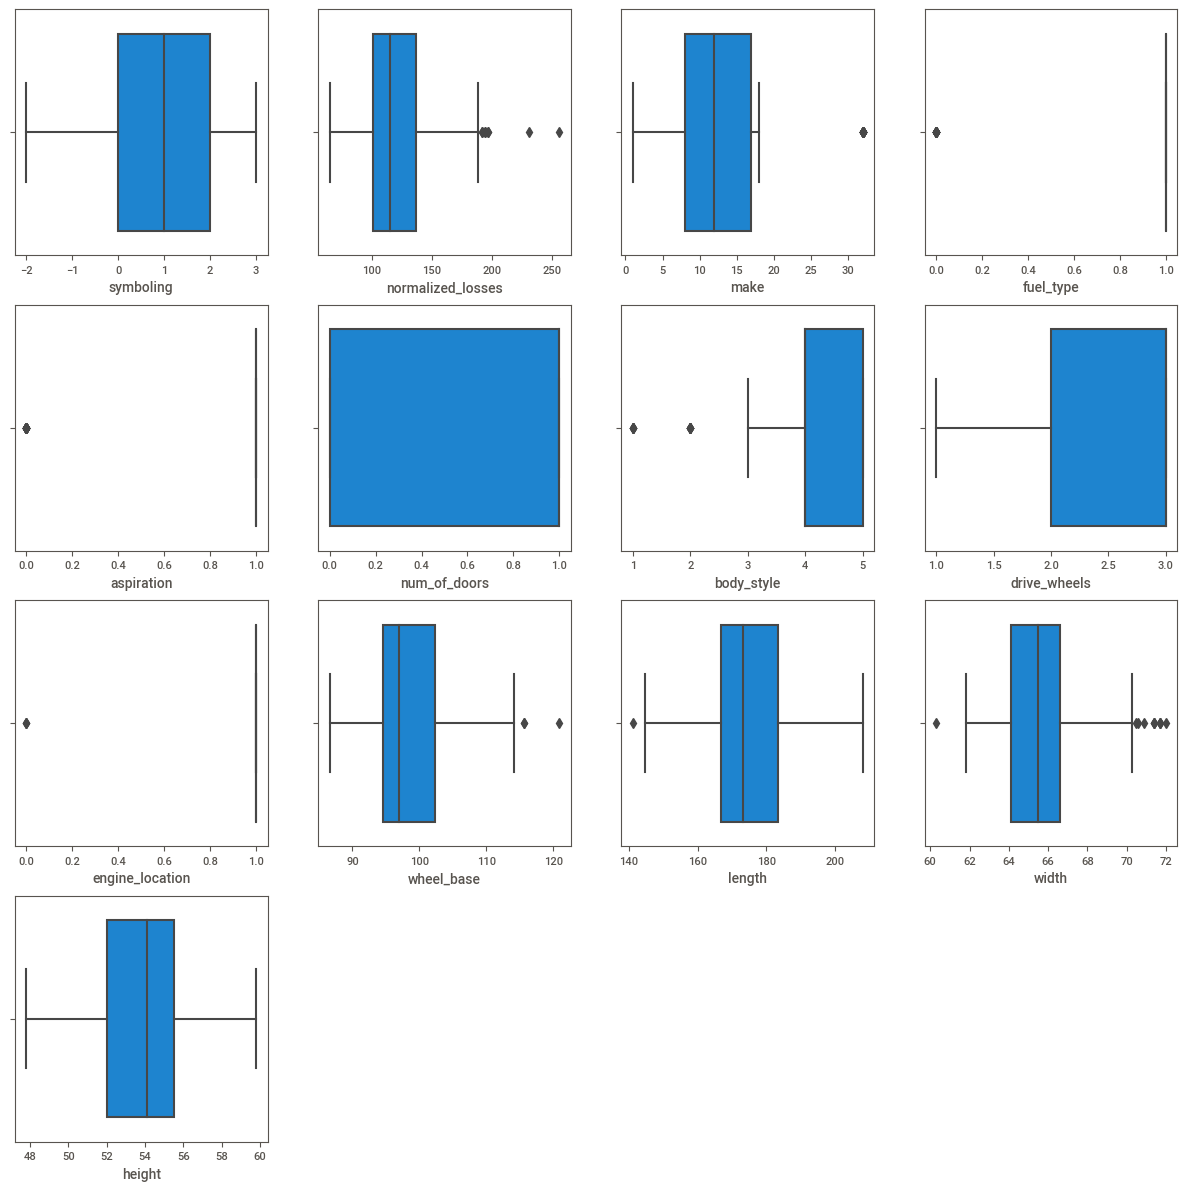

<Figure size 600x400 with 0 Axes>

In [67]:
# lets plot box plot to check outliers, before that i wanna split entire columns into two groups
O_cl=['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration',
       'num_of_doors', 'body_style', 'drive_wheels', 'engine_location',
       'wheel_base', 'length', 'width', 'height']
O_cl1=[ 'curb_weight', 'engine_type',
       'num_of_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke',
       'compression_rate', 'horsepower', 'Peak_rpm', 'city_mpg', 'highway_mpg']

# lets plot for O_cl
plt.figure(figsize=(15,15))
plt_num = 1

for cl in O_cl:
    ax=plt.subplot(4,4, plt_num)
    sns.boxplot( data[cl])
    plt_num += 1
plt.show()
plt.tight_layout()

* normalized_losses can be any extent i dont feel those are outliers
* toyota making more cars and it can be possible,so i dont treat this as outlier data
* fuel type is only two type gas and diesel
* aspiration of engine type can be both
* body style also can be any one of the given types
* there are vehicles with front and rear engine being located
* there are few vehicles with large wheel_base and it is true
* there are few brands making small vehicles(chevrolet) and large(mercedes-benz) vehicles as well

##### i dont feel above data points showing out of upper bond and lower bound are outliers , these are real data points

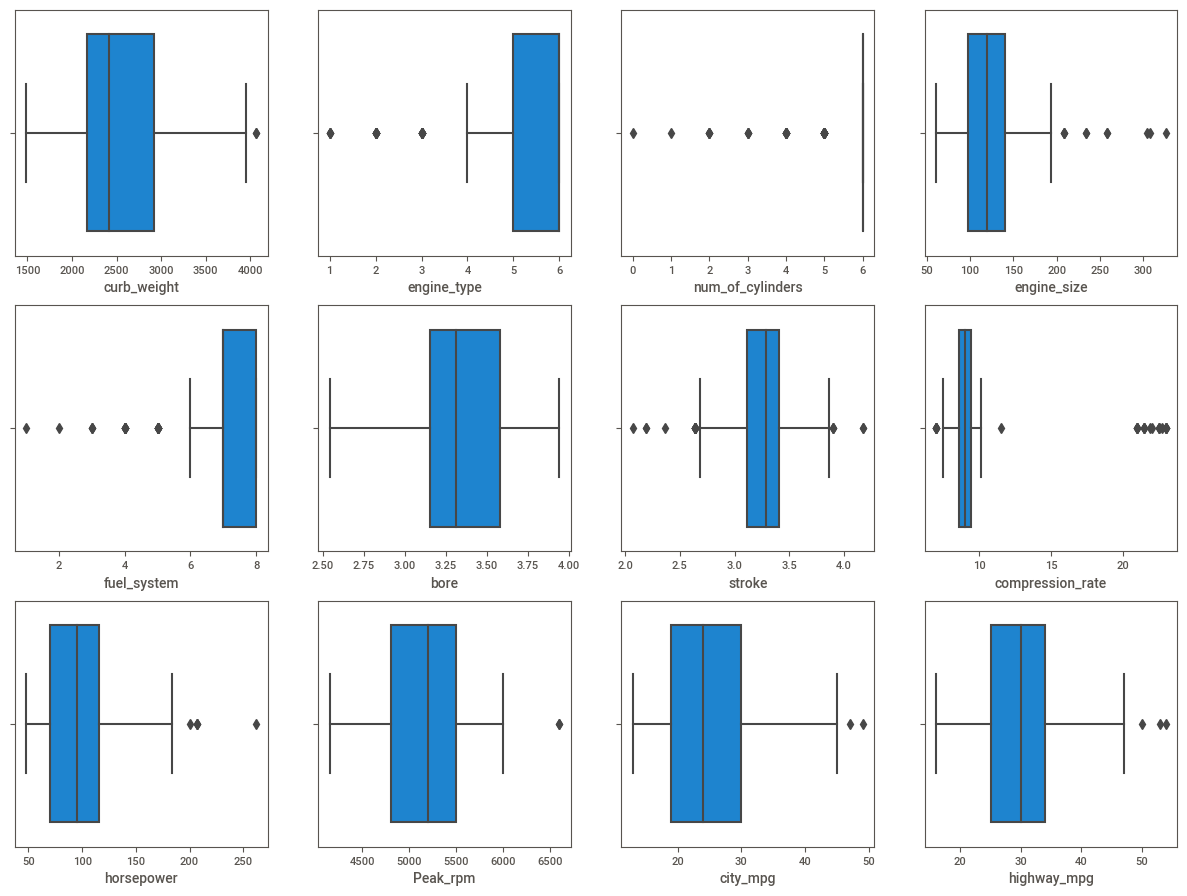

<Figure size 600x400 with 0 Axes>

In [68]:
# lets plot for O_cl1
plt.figure(figsize=(15,15))
plt_num = 1

for cl in O_cl1:
    ax=plt.subplot(4,4, plt_num)
    sns.boxplot( data[cl])
    plt_num += 1
plt.show()
plt.tight_layout()

* There are 20 attributes with compression_rate more than 20, and this can be possible only with diesel engines, and all these sample's fuel_type is diesel only, so i will not treat these points.

##### i dont feel above data points showing out of upper bond and lower bound are outliers , these are real data points

# Feature Selection

In [69]:
# lets check duplicated attributes in the dataset
data.duplicated().sum()

0

<AxesSubplot:>

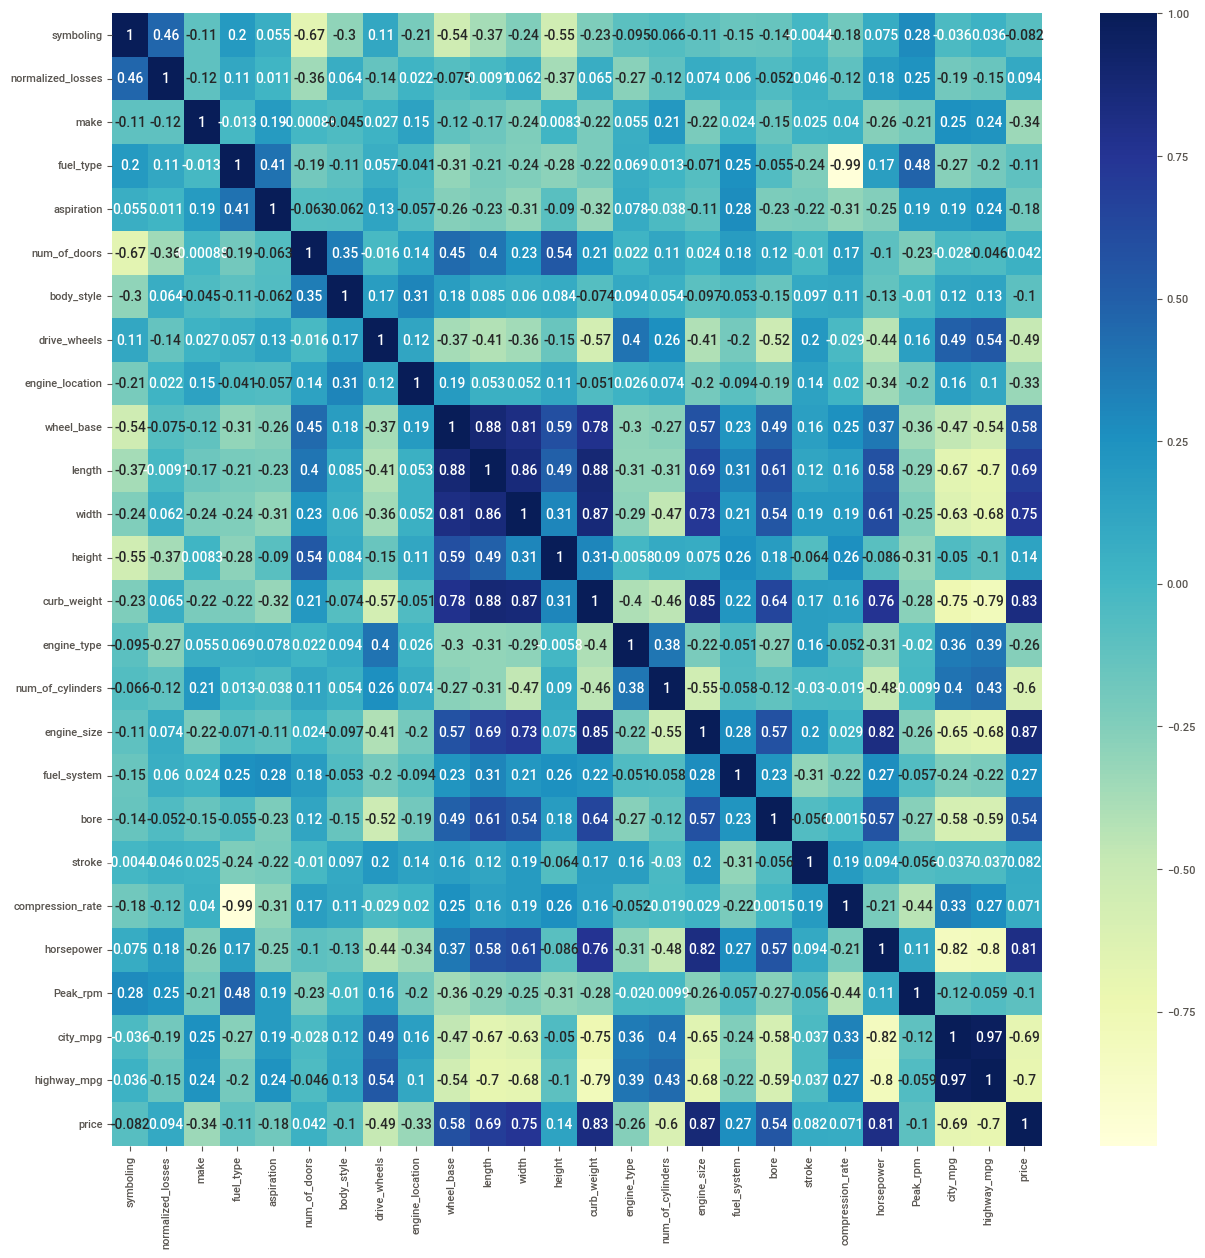

In [70]:
# lets plot heatmap for correlation
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), annot=True, cmap='YlGnBu')

#### there are two pair of features having high correlation with eachother
1. city_mpg and highway_mpg with 0.97
2. compression_rate and fuel_type -0.99

In [71]:
# lets drop two features out of these 4 which is having less correlation with 'price'
data=data.drop(["fuel_type","city_mpg"], axis=1)

In [72]:
# lets check duplicated attributes in the dataset
data.duplicated().sum()

0

# Model Creation

In [73]:
# Lets creat X and y 
X=data.drop(['price'], axis=1)
y=data['price']

#### Scaling the data

In [74]:
# lets use minmax scaler as data is not  normally distributed in almost all features
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

con_feat=['normalized_losses','make','wheel_base','length','width','height','curb_weight',
          'engine_size','bore','stroke','compression_rate','horsepower','Peak_rpm','highway_mpg']
X[con_feat]=scaler.fit_transform(X[con_feat])

In [75]:
# converting array to data frame
X_scal=pd.DataFrame(X, columns=X.columns)

## split the data into train and test

In [76]:
# lets split the data into traing and testing 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_scal,y, test_size=0.2,random_state=42)

In [77]:
# lets check the shape of traing and testing data
print(X_train.shape)
print(X_test.shape)

(160, 23)
(41, 23)


# Linear Regression model

In [78]:
# import and train the model
from sklearn.linear_model import LinearRegression
Lr=LinearRegression()

# fitting the model 
Lr.fit(X_train,y_train)

# using crossval score

from sklearn.model_selection import cross_val_score
mse=cross_val_score(Lr,X_train,y_train,scoring='neg_mean_squared_error',cv=5)
print(mse)
print("Mean of mse:",np.mean(mse))


[ -5169946.1383648   -8181011.23637966 -10538276.64820041
  -7394487.52203479 -12527549.96958386]
Mean of mse: -8762254.302912705


In [79]:
# lets predict the testing data
y_pred=Lr.predict(X_test)

# model evolution
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
r2_lr=r2_score(y_test,y_pred)
print("R2_score:",r2_lr)

# Adjusted r2 score
r2=r2_score(y_test,y_pred)
n=X.shape[0]
p=X.shape[1]
adjusted_r2=1- ((1-r2)*(n-1))/(n-p-1)
print("Adjusted_R2_score",adjusted_r2)

R2_score: 0.8685117289908759
Adjusted_R2_score 0.851425682475566


In [80]:
# mean square error 
mse_lr=mean_squared_error(y_test,y_pred)
print("mean_squared_error:",mse_lr)

# mean absolute error
mae_lr=mean_absolute_error(y_test,y_pred)
print("Mean_absolute_error:",mae_lr)

# Root mean squared error
Rmse_lr=np.sqrt(mse_lr)
print("Root_mean_squared_error",Rmse_lr)

mean_squared_error: 16087165.656188399
Mean_absolute_error: 2678.4899200306068
Root_mean_squared_error 4010.880907754355


In [81]:
# testing and training accuracy
print("Training Accuracy:",Lr.score(X_train,y_train))
print("Testing Accuracy:",Lr.score(X_test,y_test))

Training Accuracy: 0.8974804252315481
Testing Accuracy: 0.8685117289908759


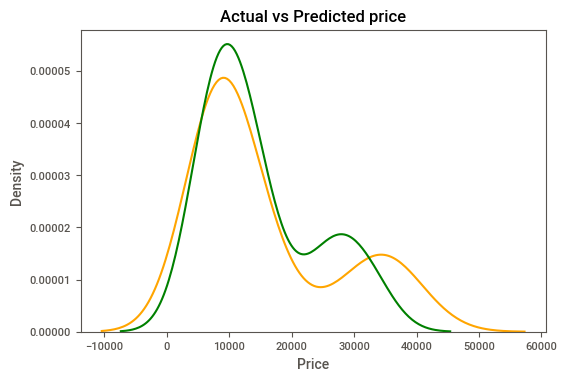

In [82]:
# lets check comparison of testing and predicted data
ax1=sns.distplot(y_test,hist=False,color="orange")
sns.distplot(y_pred,hist=False,color="g",ax=ax1)

plt.title("Actual vs Predicted price")
plt.xlabel("Price")

plt.show()

#### Lasso and Ridge regressor

In [83]:
#Applying Lasso Regularization Technique

from sklearn.linear_model import Lasso
Lasso = Lasso(alpha=0.1)
Lasso.fit(X_train,y_train)
print("Training accuracy:",Lasso.score(X_train,y_train))
print("Testing accuracy:",Lasso.score(X_test,y_test))

Training accuracy: 0.8974799256885053
Testing accuracy: 0.8684230851381766


* model performance (accuracy) not got improved with Lasso regression technique

In [84]:
#Applying Lasso Regularization Technique

from sklearn.linear_model import Ridge
Ridge = Ridge(alpha=0.1)
Ridge.fit(X_train,y_train)
print("Training accuracy:",Ridge.score(X_train,y_train))
print("Testing accuracy:",Ridge.score(X_test,y_test))

Training accuracy: 0.8967413359887438
Testing accuracy: 0.8665203575484939


* model performance (accuracy) not got improved with Ridge regression technique

### with SGD 

In [85]:
# lets import sgf regressor
from sklearn.linear_model import SGDRegressor
sgd=SGDRegressor()

# fitting the model
sgd.fit(X_train,y_train)


SGDRegressor()

In [86]:
# lets predict the test data
y_pred_sgd=sgd.predict(X_test)
print(r2_score(y_test,y_pred_sgd))

0.7467591608196964


In [87]:
print("MSE:",mean_squared_error(y_test,y_pred_sgd))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred_sgd)))

MSE: 30983199.486462314
RMSE: 5566.255427705623


####  Model performing better with OLS method only

# SVM Model

In [88]:
# lets import the model and train the model
from sklearn.svm import SVR
svm= SVR()

# lets fit the model with train data
svm.fit(X_train,y_train)

SVR()

In [89]:
# lets predict the testing data
y_pred_svm=svm.predict(X_test)

# model evolution
r2_svm=r2_score(y_test,y_pred_svm)
print("R2_score:",r2_svm)

# Adjusted r2 score
n1=X.shape[0]
p1=X.shape[1]
adjusted_r2_svm=1- ((1-r2_svm)*(n1-1))/(n1-p1-1)
print("Adjusted_R2_score",adjusted_r2_svm)

R2_score: -0.2211788250114668
Adjusted_R2_score -0.3798630791090021


In [90]:
# mean square error 
mse_svm=mean_squared_error(y_test,y_pred_svm)
print("mean_squared_error:",mse_svm)

# mean absolute error
mae_svm=mean_absolute_error(y_test,y_pred_svm)
print("Mean_absolute_error:",mae_svm)

# Root mean squared error
Rmse_svm=np.sqrt(mse_svm)
print("Root_mean_squared_error",Rmse_svm)

mean_squared_error: 149407288.59706256
Mean_absolute_error: 7951.003668856483
Root_mean_squared_error 12223.227421473535


In [91]:
# testing and training accuracy
print("Training Accuracy:",svm.score(X_train,y_train))
print("Testing Accuracy:",svm.score(X_test,y_test))

Training Accuracy: -0.09619618902657079
Testing Accuracy: -0.2211788250114668


##### hyper parameter tuning

In [92]:
# lets creater a parameter disctionary

params={ 'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
         'degree': [0.001,0.005,0.05,0.1,1],
         'gamma' : ['scale','auto'],
        'C': [0.001,0.005,0.1,1,2,3,4]}

# lets import GridSearchCV from scikit learn
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(SVR(),params,refit=True,cv=3,scoring='accuracy')

In [93]:
# fitting gridsearchCV
grid.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=SVR(),
             param_grid={'C': [0.001, 0.005, 0.1, 1, 2, 3, 4],
                         'degree': [0.001, 0.005, 0.05, 0.1, 1],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy')

In [94]:
# print best parameters
print(grid.best_params_)

{'C': 0.001, 'degree': 0.001, 'gamma': 'scale', 'kernel': 'linear'}


In [95]:
# lets train the model with new parameters
svm_grid=SVR(C=0.001, degree=0.001, gamma='scale', kernel= 'linear')

# fit the model
svm_grid.fit(X_train,y_train)

SVR(C=0.001, degree=0.001, kernel='linear')

In [96]:
# lets predict the testing data
y_pred_svm_grid=svm.predict(X_test)

# model evolution
r2_svm_grid=r2_score(y_test,y_pred_svm_grid)
print("R2_score:",r2_svm_grid)

# Adjusted r2 score
n11=X.shape[0]
p11=X.shape[1]
adjusted_r2_svmgrid=1- ((1-r2_svm_grid)*(n11-1))/(n11-p11-1)
print("Adjusted_R2_score",adjusted_r2_svmgrid)

R2_score: -0.2211788250114668
Adjusted_R2_score -0.3798630791090021


In [97]:
# mean square error 
mse_svmgrid=mean_squared_error(y_test,y_pred_svm_grid)
print("mean_squared_error:",mse_svmgrid)

# mean absolute error
mae_svmgrid=mean_absolute_error(y_test,y_pred_svm_grid)
print("Mean_absolute_error:",mae_svmgrid)

# Root mean squared error
Rmse_svmgrid=np.sqrt(mse_svmgrid)
print("Root_mean_squared_error",Rmse_svmgrid)

mean_squared_error: 149407288.59706256
Mean_absolute_error: 7951.003668856483
Root_mean_squared_error 12223.227421473535


###### model performance not got improved even after hyper parameter tuning, Linear regression model performing better than SVM

# KNeighbors Model

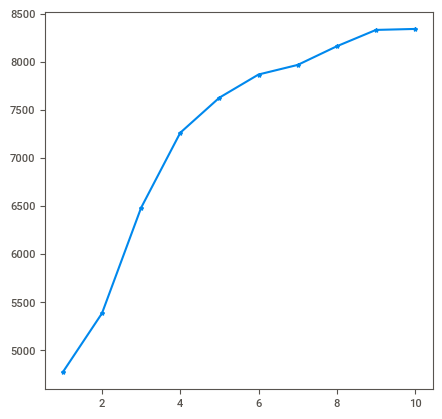

In [98]:
# import and train the model
error_rate=[]
for i in range (1,11):
    from sklearn.neighbors import KNeighborsRegressor
    knr=KNeighborsRegressor(n_neighbors=i)
    knr.fit(X_train,y_train)
    y_pred_knr=knr.predict(X_test)
    error_rate.append(np.sqrt(mean_squared_error(y_test,y_pred_knr)))
# plot the graph to find the best fit 'k' value

plt.figure(figsize=(5,5))
plt.plot(np.arange(1,11),error_rate, marker='*')
    

In [99]:
# lets take k=2 and start predicting the model
knr_f=KNeighborsRegressor(n_neighbors=2)
knr_f.fit(X_train,y_train)

# lets predict the target and evalute the model
y_pred_knn_f=knr_f.predict(X_test)

# model evolution
r2_knr=r2_score(y_test,y_pred_knn_f)
print("R2_score:",r2_knr)

# Adjusted r2 score
n=X.shape[0]
p=X.shape[1]
adjusted_r2_knr=1- ((1-r2_knr)*(n-1))/(n-p-1)
print("Adjusted_R2_score",adjusted_r2_knr)

R2_score: 0.7630063576376501
Adjusted_R2_score 0.7322105736018645


In [100]:
# mean square error 
mse_knr=mean_squared_error(y_test,y_pred_knn_f)
print("mean_squared_error:",mse_knr)

# mean absolute error
mae_knr=mean_absolute_error(y_test,y_pred_knn_f)
print("Mean_absolute_error:",mae_knr)

# Root mean squared error
Rmse_knr=np.sqrt(mse_knr)
print("Root_mean_squared_error",Rmse_knr)

mean_squared_error: 28995407.38414634
Mean_absolute_error: 3415.3536585365855
Root_mean_squared_error 5384.738376573772


In [101]:
# testing and training accuracy
print("Training Accuracy:",knr.score(X_train,y_train))
print("Testing Accuracy:",knr.score(X_test,y_test))

Training Accuracy: 0.6292921425886798
Testing Accuracy: 0.4312506282107639


##### Model performance good with Linear Regression model only

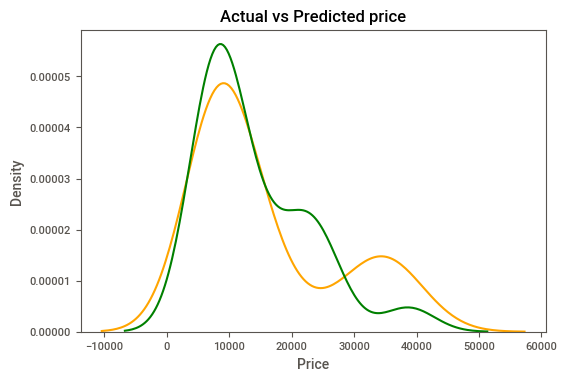

In [102]:
# lets check comparison of testing and predicted data
ax1=sns.distplot(y_test,hist=False,color="orange")
sns.distplot(y_pred_knn_f,hist=False,color="g",ax=ax1)

plt.title("Actual vs Predicted price")
plt.xlabel("Price")

plt.show()

# Decision Tree Regressor

#### with scaling data

In [103]:
# lets import and train and test the model

from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(random_state=44)

# fitting the model
dtr.fit(X_train,y_train)

DecisionTreeRegressor(random_state=44)

In [104]:
# lets predict the target for test data
y_pred_dtr=dtr.predict(X_test)

# model evolution
r2_dtr=r2_score(y_test,y_pred_dtr)
print("R2_score:",r2_dtr)

# Adjusted r2 score
n=X.shape[0]
p=X.shape[1]
adjusted_r2_dtr=1- ((1-r2_dtr)*(n-1))/(n-p-1)
print("Adjusted_R2_score",adjusted_r2_dtr)

R2_score: 0.9273234374352722
Adjusted_R2_score 0.9178795903223416


In [105]:
# mean square error 
mse_dtr=mean_squared_error(y_test,y_pred_dtr)
print("mean_squared_error:",mse_dtr)

# mean absolute error
mae_dtr=mean_absolute_error(y_test,y_pred_dtr)
print("Mean_absolute_error:",mae_dtr)

# Root mean squared error
Rmse_dtr=np.sqrt(mse_dtr)
print("Root_mean_squared_error",Rmse_dtr)

mean_squared_error: 8891742.908536585
Mean_absolute_error: 2021.4756097560976
Root_mean_squared_error 2981.9025652319


In [106]:
# testing and training accuracy
print("Training Accuracy:",dtr.score(X_train,y_train))
print("Testing Accuracy:",dtr.score(X_test,y_test))

Training Accuracy: 0.9989831862870213
Testing Accuracy: 0.9273234374352722


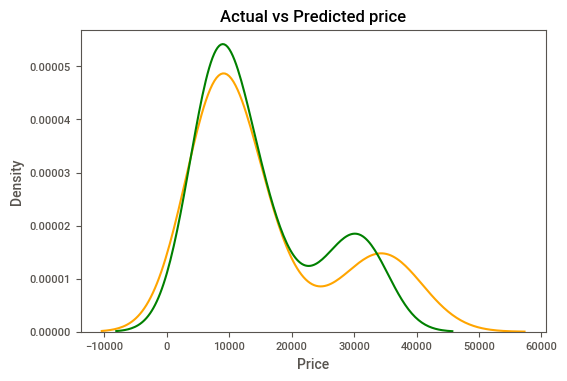

In [107]:
# lets check comparison of testing and predicted data
ax1=sns.distplot(y_test,hist=False,color="orange")
sns.distplot(y_pred_dtr,hist=False,color="g",ax=ax1)

plt.title("Actual vs Predicted price")
plt.xlabel("Price")

plt.show()

In [108]:
# hyper parameter tuning for Decision tree
params_dt={ 'criterion' : ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
        'splitter': ['best', 'random'],
        'max_depth' : [5,10,15,20,50],
        'min_samples_split' : [2,3,4,5,6,7,8],
        'min_samples_leaf' : [1,2,3,4,5,6,7],
           "max_features":["auto","log2","sqrt",None],
           'max_leaf_nodes': [10,20,50,60] 
}

# lets check best parameters using gridSearchCV

from sklearn.model_selection import GridSearchCV
dt_grid=GridSearchCV(DecisionTreeRegressor(random_state=16), params_dt, verbose=1,cv=3,scoring='neg_mean_squared_error',n_jobs=1)
dt_grid.fit(X_train,y_train)

# getting best fit parameters
print(dt_grid.best_params_)

Fitting 3 folds for each of 31360 candidates, totalling 94080 fits
{'criterion': 'poisson', 'max_depth': 10, 'max_features': 'auto', 'max_leaf_nodes': 50, 'min_samples_leaf': 1, 'min_samples_split': 4, 'splitter': 'best'}


* 'criterion': 'poisson', 'max_depth': 10, 'max_features': 'auto', 'max_leaf_nodes': 50, 'min_samples_leaf': 1, 'min_samples_split': 4, 'splitter': 'best'

In [109]:
# lets train the mdoel with tuned hyperparameters
dtr_tun=DecisionTreeRegressor(criterion='poisson',max_depth=10, max_features='auto', max_leaf_nodes= 50,
                              min_samples_leaf=1, min_samples_split= 4, splitter= 'best')

# fitting the model
dtr_tun.fit(X_train,y_train)

DecisionTreeRegressor(criterion='poisson', max_depth=10, max_features='auto',
                      max_leaf_nodes=50, min_samples_split=4)

In [110]:
# lets predict the target for test data
y_pred_dtr_tun=dtr_tun.predict(X_test)

# model evolution
r2_dtr_tun=r2_score(y_test,y_pred_dtr_tun)
print("R2_score:",r2_dtr_tun)

# Adjusted r2 score
n=X.shape[0]
p=X.shape[1]
adjusted_r2_dtr_tun=1- ((1-r2_dtr_tun)*(n-1))/(n-p-1)
print("Adjusted_R2_score",adjusted_r2_dtr_tun)

R2_score: 0.9373348352838032
Adjusted_R2_score 0.9291919042754839


In [111]:
# mean square error 
mse_dtr_tun=mean_squared_error(y_test,y_pred_dtr_tun)
print("mean_squared_error:",mse_dtr_tun)

# mean absolute error
mae_dtr_tun=mean_absolute_error(y_test,y_pred_dtr_tun)
print("Mean_absolute_error:",mae_dtr_tun)

# Root mean squared error
Rmse_dtr_tun=np.sqrt(mse_dtr_tun)
print("Root_mean_squared_error",Rmse_dtr_tun)

mean_squared_error: 7666880.687721846
Mean_absolute_error: 1919.7592818428182
Root_mean_squared_error 2768.9132683639345


In [112]:
# testing and training accuracy
print("Training Accuracy:",dtr_tun.score(X_train,y_train))
print("Testing Accuracy:",dtr_tun.score(X_test,y_test))

Training Accuracy: 0.9906567227933172
Testing Accuracy: 0.9373348352838032


###### model performance got improved with hyperparameter tuning

###### without scaling the data

In [113]:
# lets split the data into traing and testing 
from sklearn.model_selection import train_test_split
X_train1,X_test1,y_train1,y_test1=train_test_split(X,y, test_size=0.2,random_state=42)

In [114]:
# lets import and train and test the model

from sklearn.tree import DecisionTreeRegressor
dtr1=DecisionTreeRegressor()

# fitting the model
dtr1.fit(X_train1,y_train1)

DecisionTreeRegressor()

In [115]:
# lets predict the target for test data
y_pred_dtr1=dtr1.predict(X_test1)

# model evolution
r2_dtr1=r2_score(y_test1,y_pred_dtr1)
print("R2_score:",r2_dtr1)

# Adjusted r2 score
n=X.shape[0]
p=X.shape[1]
adjusted_r2_dtr1=1- ((1-r2_dtr1)*(n-1))/(n-p-1)
print("Adjusted_R2_score",adjusted_r2_dtr1)

R2_score: 0.914452761229082
Adjusted_R2_score 0.9033364533661944


In [116]:
# mean square error 
mse_dtr1=mean_squared_error(y_test1,y_pred_dtr1)
print("mean_squared_error:",mse_dtr1)

# mean absolute error
mae_dtr1=mean_absolute_error(y_test1,y_pred_dtr1)
print("Mean_absolute_error:",mae_dtr1)

# Root mean squared error
Rmse_dtr1=np.sqrt(mse_dtr1)
print("Root_mean_squared_error",Rmse_dtr1)

mean_squared_error: 10466428.609756097
Mean_absolute_error: 2147.0
Root_mean_squared_error 3235.186023980089


In [117]:
# testing and training accuracy
print("Training Accuracy:",dtr.score(X_train1,y_train1))
print("Testing Accuracy:",dtr.score(X_test1,y_test1))

Training Accuracy: 0.9989831862870213
Testing Accuracy: 0.9273234374352722


##### model performance not good without scaling the data and not better than Linear Regression model

# RandomForest Regressor

In [118]:
# lets import the model and train the model

from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(random_state=16)

# fitting the model
rf.fit(X_train,y_train)

RandomForestRegressor(random_state=16)

In [119]:
# lets predict the target for test data
y_pred_rf=rf.predict(X_test)

# model evolution
r2_rf=r2_score(y_test,y_pred_rf)
print("R2_score:",r2_rf)

# Adjusted r2 score
n=X.shape[0]
p=X.shape[1]
adjusted_r2_rf=1- ((1-r2_rf)*(n-1))/(n-p-1)
print("Adjusted_R2_score",adjusted_r2_rf)

R2_score: 0.9334687578794916
Adjusted_R2_score 0.9248234552310639


In [120]:
# mean square error 
mse_rf=mean_squared_error(y_test,y_pred_rf)
print("mean_squared_error:",mse_rf)

# mean absolute error
mae_rf=mean_absolute_error(y_test,y_pred_rf)
print("Mean_absolute_error:",mae_rf)

# Root mean squared error
Rmse_rf=np.sqrt(mse_rf)
print("Root_mean_squared_error",Rmse_rf)

mean_squared_error: 8139882.782627282
Mean_absolute_error: 1841.671885017422
Root_mean_squared_error 2853.047981129529


In [121]:
# testing and training accuracy
print("Training Accuracy:",rf.score(X_train,y_train))
print("Testing Accuracy:",rf.score(X_test,y_test))

Training Accuracy: 0.9832385250853596
Testing Accuracy: 0.9334687578794916


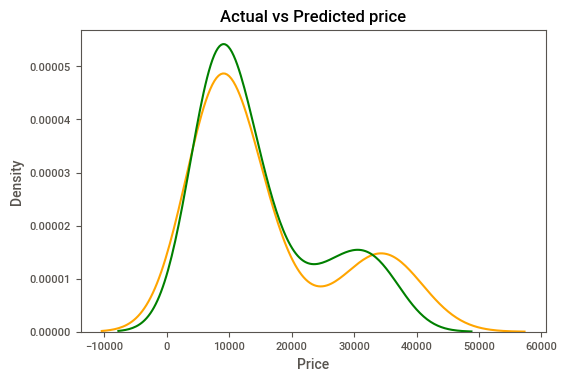

In [122]:
# lets check comparison of testing and predicted data
ax1=sns.distplot(y_test,hist=False,color="orange")
sns.distplot(y_pred_rf,hist=False,color="g",ax=ax1)

plt.title("Actual vs Predicted price")
plt.xlabel("Price")

plt.show()

In [123]:
# Hyperperameter tuning using RandomisedSearch CV

params={ 'n_estimators': [10,15,20,25,30,40,50],
        'criterion': ['squared_error', 'absolute_error', 'poisson'],
        'max_features' : ['sqrt','log2', None],
        'max_depth' : [10,15,20,25,30,35,40],
        'min_samples_split' : [2,3,4,5,6,7,8],
        'min_samples_leaf' : [1, 2,3,4,5,6],
        'bootstrap' : [True, False]
    
}
from sklearn.model_selection import GridSearchCV
rf_grid=GridSearchCV(estimator=RandomForestRegressor(random_state=16),param_grid=params,cv=3,
                           verbose=1,n_jobs=-1, scoring='neg_mean_squared_error')

# fitting model

rf_grid.fit(X_train,y_train)
print(rf_grid.best_params_)

Fitting 3 folds for each of 37044 candidates, totalling 111132 fits
{'bootstrap': False, 'criterion': 'squared_error', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 40}


* 'bootstrap': False, 'criterion': 'squared_error', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 40

In [124]:
# lets train the model with tuned perameters
rf_tun=RandomForestRegressor(bootstrap=False, criterion='squared_error',max_depth=10, max_features='sqrt', 
                             min_samples_leaf= 1, min_samples_split= 2, n_estimators= 40, random_state=44)

# fitting the model
rf_tun.fit(X_train,y_train)

RandomForestRegressor(bootstrap=False, max_depth=10, max_features='sqrt',
                      n_estimators=40, random_state=44)

In [125]:
# lets predict the target for test data
y_pred_rf_tun=rf_tun.predict(X_test)

# model evolution
r2_rf_tun=r2_score(y_test,y_pred_rf_tun)
print("R2_score:",r2_rf_tun)

# Adjusted r2 score
n=X.shape[0]
p=X.shape[1]
adjusted_r2_rf_tun=1- ((1-r2_rf_tun)*(n-1))/(n-p-1)
print("Adjusted_R2_score",adjusted_r2_rf_tun)

R2_score: 0.9389774899766296
Adjusted_R2_score 0.9310480112730277


In [126]:
# mean square error 
mse_rf_tun=mean_squared_error(y_test,y_pred_rf_tun)
print("mean_squared_error:",mse_rf_tun)

# mean absolute error
mae_rf_tun=mean_absolute_error(y_test,y_pred_rf_tun)
print("Mean_absolute_error:",mae_rf_tun)

# Root mean squared error
Rmse_rf_tun=np.sqrt(mse_rf_tun)
print("Root_mean_squared_error",Rmse_rf_tun)

mean_squared_error: 7465907.1867654165
Mean_absolute_error: 1644.8064496360685
Root_mean_squared_error 2732.3812301297594


In [127]:
# testing and training accuracy
print("Training Accuracy:",rf_tun.score(X_train,y_train))
print("Testing Accuracy:",rf_tun.score(X_test,y_test))

Training Accuracy: 0.9972895283291889
Testing Accuracy: 0.9389774899766296


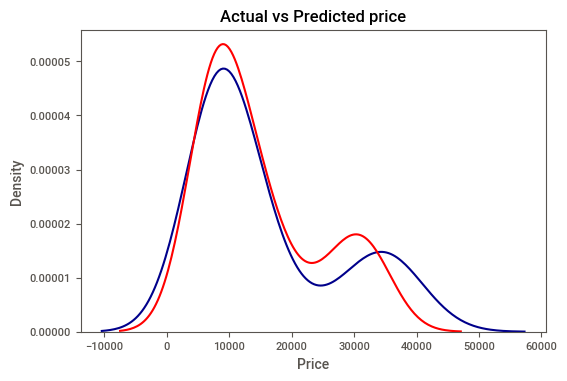

In [128]:
# lets check comparison of testing and predicted data
ax1=sns.distplot(y_test,hist=False,color="darkblue")
sns.distplot(y_pred_rf_tun,hist=False,color="red",ax=ax1)

plt.title("Actual vs Predicted price")
plt.xlabel("Price")

plt.show()

###### model performance got improved after hyper perameter tuning, and performing better than all other model performed till now

# Bagging

#### Bagging using Linear Regression

In [129]:
# import the model and fit the model

from sklearn.ensemble import BaggingRegressor
bag=BaggingRegressor(base_estimator= Lr, n_estimators=20, random_state=16)

# fitting the model
bag.fit(X_train,y_train)

BaggingRegressor(base_estimator=LinearRegression(), n_estimators=20,
                 random_state=16)

In [130]:
# lets predict the target for test data
y_pred_bag=bag.predict(X_test)

# model evolution
r2_bag=r2_score(y_test,y_pred_bag)
print("R2_score:",r2_bag)

# Adjusted r2 score
n=X.shape[0]
p=X.shape[1]
adjusted_r2_bag=1- ((1-r2_bag)*(n-1))/(n-p-1)
print("Adjusted_R2_score",adjusted_r2_bag)

R2_score: 0.8519265787421665
Adjusted_R2_score 0.8326853997086627


In [131]:
# mean square error 
mse_bag=mean_squared_error(y_test,y_pred_bag)
print("mean_squared_error:",mse_bag)

# mean absolute error
mae_bag=mean_absolute_error(y_test,y_pred_bag)
print("Mean_absolute_error:",mae_bag)

# Root mean squared error
Rmse_bag=np.sqrt(mse_bag)
print("Root_mean_squared_error",Rmse_bag)

mean_squared_error: 18116305.27020955
Mean_absolute_error: 2856.2097226174633
Root_mean_squared_error 4256.325324761907


In [132]:
# testing and training accuracy
print("Training Accuracy:",bag.score(X_train,y_train))
print("Testing Accuracy:",bag.score(X_test,y_test))

Training Accuracy: 0.8931680639128387
Testing Accuracy: 0.8519265787421665


##### Model performing ok, but not better than RandomForestRegressor

##### As SVM and KNN models not performing well , i will not try bagging techniques with these models

# Boosting Techniques

### Ada Boosting Regressor

In [133]:
# lets import the model and train the model
from sklearn.ensemble import AdaBoostRegressor
adr=AdaBoostRegressor(random_state=44)

# lets fit the model with training data
adr.fit(X_train,y_train)

AdaBoostRegressor(random_state=44)

In [134]:
# lets predict the target for test data
y_pred_ada=adr.predict(X_test)

# model evolution
r2_ada=r2_score(y_test,y_pred_ada)
print("R2_score:",r2_ada)

# Adjusted r2 score
n=X.shape[0]
p=X.shape[1]
adjusted_r2_ada=1- ((1-r2_ada)*(n-1))/(n-p-1)
print("Adjusted_R2_score",adjusted_r2_ada)

R2_score: 0.9250281000642864
Adjusted_R2_score 0.915285988773205


In [135]:
# mean square error 
mse_ada=mean_squared_error(y_test,y_pred_ada)
print("mean_squared_error:",mse_ada)

# mean absolute error
mae_ada=mean_absolute_error(y_test,y_pred_ada)
print("Mean_absolute_error:",mae_ada)

# Root mean squared error
Rmse_ada=np.sqrt(mse_ada)
print("Root_mean_squared_error",Rmse_ada)

mean_squared_error: 9172570.029012807
Mean_absolute_error: 2304.3645540493094
Root_mean_squared_error 3028.6251053923475


In [136]:
# testing and training accuracy
print("Training Accuracy:",adr.score(X_train,y_train))
print("Testing Accuracy:",adr.score(X_test,y_test))

Training Accuracy: 0.9484099095435736
Testing Accuracy: 0.9250281000642864


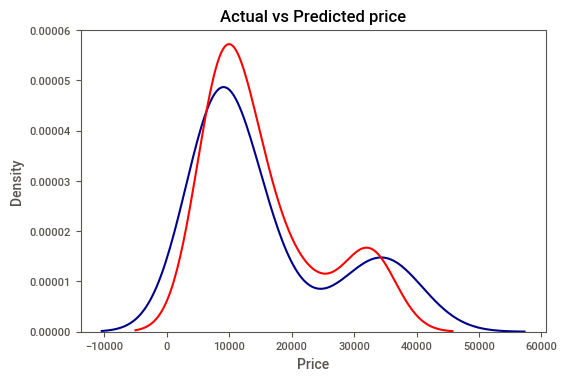

In [137]:
# lets check comparison of testing and predicted data
ax1=sns.distplot(y_test,hist=False,color="darkblue")
sns.distplot(y_pred_ada,hist=False,color="red",ax=ax1)

plt.title("Actual vs Predicted price")
plt.xlabel("Price")

plt.show()

##### Model performing ok, but not better than Random forest model

### Gradient boosting regressor

In [138]:
# lets import and train the model
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor(random_state=16)

# lets train the model with training data
gbr.fit(X_train,y_train)

GradientBoostingRegressor(random_state=16)

In [139]:
# lets predict the target for test data
y_pred_gbr=gbr.predict(X_test)

# model evolution
r2_gbr=r2_score(y_test,y_pred_gbr)
print("R2_score:",r2_gbr)

# Adjusted r2 score
n=X.shape[0]
p=X.shape[1]
adjusted_r2_gbr=1- ((1-r2_gbr)*(n-1))/(n-p-1)
print("Adjusted_R2_score",adjusted_r2_gbr)

R2_score: 0.9505141886717018
Adjusted_R2_score 0.9440838290075726


In [140]:
# mean square error 
mse_gbr=mean_squared_error(y_test,y_pred_gbr)
print("mean_squared_error:",mse_gbr)

# mean absolute error
mae_gbr=mean_absolute_error(y_test,y_pred_gbr)
print("Mean_absolute_error:",mae_gbr)

# Root mean squared error
Rmse_gbr=np.sqrt(mse_gbr)
print("Root_mean_squared_error",Rmse_gbr)

mean_squared_error: 6054429.32939606
Mean_absolute_error: 1529.8334372955983
Root_mean_squared_error 2460.574999750274


In [141]:
# testing and training accuracy
print("Training Accuracy:",gbr.score(X_train,y_train))
print("Testing Accuracy:",gbr.score(X_test,y_test))

Training Accuracy: 0.9925868061432546
Testing Accuracy: 0.9505141886717018


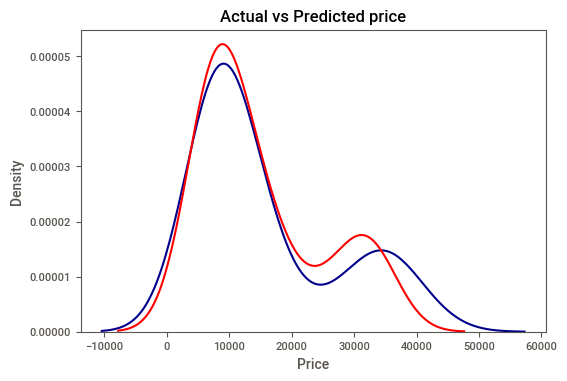

In [142]:
# lets check comparison of testing and predicted data
ax1=sns.distplot(y_test,hist=False,color="darkblue")
sns.distplot(y_pred_gbr,hist=False,color="red",ax=ax1)

plt.title("Actual vs Predicted price")
plt.xlabel("Price")

plt.show()

##### model performing better than Random forest model

## XGBoosting Regressor

In [143]:
# lets import and train the model
import xgboost
# model creation
from xgboost import XGBRegressor
xgbr=XGBRegressor()

# lets train the model with training data
xgbr.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [144]:
# lets predict the target for test data
y_pred_xgbr=xgbr.predict(X_test)

# model evolution
r2_xgbr=r2_score(y_test,y_pred_xgbr)
print("R2_score:",r2_xgbr)

# Adjusted r2 score
n=X.shape[0]
p=X.shape[1]
adjusted_r2_xgbr=1- ((1-r2_xgbr)*(n-1))/(n-p-1)
print("Adjusted_R2_score",adjusted_r2_xgbr)

R2_score: 0.9535295754354146
Adjusted_R2_score 0.947491045689734


In [145]:
# mean square error 
mse_xgbr=mean_squared_error(y_test,y_pred_xgbr)
print("mean_squared_error:",mse_xgbr)

# mean absolute error
mae_xgbr=mean_absolute_error(y_test,y_pred_xgbr)
print("Mean_absolute_error:",mae_xgbr)

# Root mean squared error
Rmse_xgbr=np.sqrt(mse_xgbr)
print("Root_mean_squared_error",Rmse_xgbr)

mean_squared_error: 5685506.489259539
Mean_absolute_error: 1508.0655606897865
Root_mean_squared_error 2384.430013495791


In [146]:
# testing and training accuracy
print("Training Accuracy:",xgbr.score(X_train,y_train))
print("Testing Accuracy:",xgbr.score(X_test,y_test))

Training Accuracy: 0.99898168637301
Testing Accuracy: 0.9535295754354146


In [147]:
# create the dictionary of parameters

param_xgb={'gamma' : [0.01,0.05,0.1,0.2,0.3,0.4],
      'learning_rate': [0.01,0.05,0.1,0.15,0.2,0.3,0.5],
       'max_depth':[2,3,4,5,6,8,10,15,20],
       'reg_alpha':[0.5,1,1.5,2,2.5,3],
       'n_estimators': [10,30,60,100,150],
       'subsample': [0.1,0.3,0.5,0.8,1.5]
      }

from sklearn.model_selection import GridSearchCV

grid_xgbr= GridSearchCV(estimator = XGBRegressor(random_state=16),param_grid=param_xgb,scoring='neg_mean_squared_error', n_jobs=-1,
                        cv=3,verbose=1)

# fit the rcv

grid_xgbr.fit(X_train,y_train)

print(grid_xgbr.best_params_)

Fitting 3 folds for each of 56700 candidates, totalling 170100 fits
{'gamma': 0.01, 'learning_rate': 0.15, 'max_depth': 2, 'n_estimators': 100, 'reg_alpha': 3, 'subsample': 0.8}


* 'gamma': 0.01, 'learning_rate': 0.15, 'max_depth': 2, 'n_estimators': 100, 'reg_alpha': 3, 'subsample': 0.8}

In [148]:
# lets train the model with tuned perameters
xgbr_tun=XGBRegressor(gamma=0.01,learning_rate=0.15,max_depth=2,n_estimators=100,reg_alpha=3,subsample=0.8, random_state=44)

# fitting the model
xgbr_tun.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0.01, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.15, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=2, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=44,
             reg_alpha=3, reg_lambda=1, ...)

In [149]:
# lets predict the target for test data
y_pred_xgbr_tun=xgbr_tun.predict(X_test)

# model evolution
r2_xgbr_tun=r2_score(y_test,y_pred_xgbr_tun)
print("R2_score:",r2_xgbr_tun)

# Adjusted r2 score
n=X.shape[0]
p=X.shape[1]
adjusted_r2_xgbr_tun=1- ((1-r2_xgbr_tun)*(n-1))/(n-p-1)
print("Adjusted_R2_score",adjusted_r2_xgbr_tun)

R2_score: 0.9610733889795279
Adjusted_R2_score 0.9560151287904269


In [150]:
# mean square error 
mse_xgbr_tun=mean_squared_error(y_test,y_pred_xgbr_tun)
print("mean_squared_error:",mse_xgbr_tun)

# mean absolute error
mae_xgbr_tun=mean_absolute_error(y_test,y_pred_xgbr_tun)
print("Mean_absolute_error:",mae_xgbr_tun)

# Root mean squared error
Rmse_xgbr_tun=np.sqrt(mse_xgbr_tun)
print("Root_mean_squared_error",Rmse_xgbr_tun)

mean_squared_error: 4762545.245399795
Mean_absolute_error: 1396.6912990663109
Root_mean_squared_error 2182.3256506304906


In [151]:
# testing and training accuracy
print("Training Accuracy:",xgbr_tun.score(X_train,y_train))
print("Testing Accuracy:",xgbr_tun.score(X_test,y_test))

Training Accuracy: 0.9851461853744332
Testing Accuracy: 0.9610733889795279


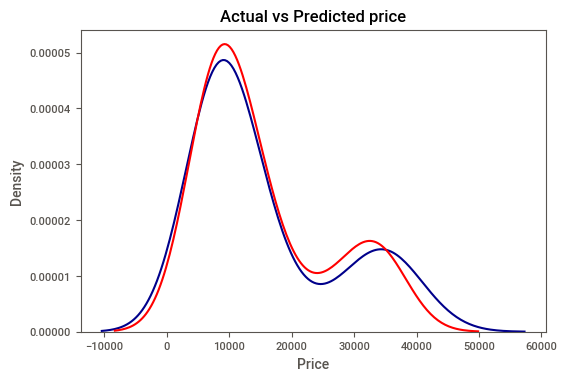

In [152]:
# lets check comparison of testing and predicted data
ax1=sns.distplot(y_test,hist=False,color="darkblue")
sns.distplot(y_pred_xgbr_tun,hist=False,color="red",ax=ax1)

plt.title("Actual vs Predicted price")
plt.xlabel("Price")

plt.show()

##### XGB Regressor performing better than all other models , and performance also got improved after hyperparameter tuning

## Huber Regressor

In [153]:
# lets import the model and train the model
from sklearn.linear_model import HuberRegressor

hr = HuberRegressor()

hr.fit(X_train,y_train)

HuberRegressor()

In [154]:
# lets predict the target for test data
y_pred_hr=hr.predict(X_test)

# model evolution
r2_hr=r2_score(y_test,y_pred_hr)
print("R2_score:",r2_hr)

# Adjusted r2 score
n=X.shape[0]
p=X.shape[1]
adjusted_r2_hr=1- ((1-r2_hr)*(n-1))/(n-p-1)
print("Adjusted_R2_score",adjusted_r2_hr)

R2_score: 0.6965684118871966
Adjusted_R2_score 0.6571394484601092


In [155]:
# mean square error 
mse_hr=mean_squared_error(y_test,y_pred_hr)
print("mean_squared_error:",mse_hr)

# mean absolute error
mae_hr=mean_absolute_error(y_test,y_pred_hr)
print("Mean_absolute_error:",mae_hr)

# Root mean squared error
Rmse_hr=np.sqrt(mse_hr)
print("Root_mean_squared_error",Rmse_hr)

mean_squared_error: 37123875.65695706
Mean_absolute_error: 3680.293394597803
Root_mean_squared_error 6092.936538070708


In [156]:
# testing and training accuracy
print("Training Accuracy:",hr.score(X_train,y_train))
print("Testing Accuracy:",hr.score(X_test,y_test))

Training Accuracy: 0.8353832858950637
Testing Accuracy: 0.6965684118871966


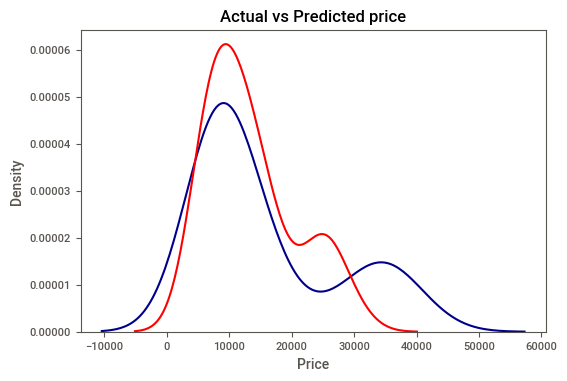

In [157]:
# lets check comparison of testing and predicted data
ax1=sns.distplot(y_test,hist=False,color="darkblue")
sns.distplot(y_pred_hr,hist=False,color="red",ax=ax1)

plt.title("Actual vs Predicted price")
plt.xlabel("Price")

plt.show()

* model not performing better than best model(XGB)

### Comparison Report:

In [159]:
LR_re=[r2,adjusted_r2,mse_lr,mae_lr,Rmse_lr,Lr.score(X_train,y_train),Lr.score(X_test,y_test)]
KNN_re=[r2_knr,adjusted_r2_knr,mse_knr,mae_knr,Rmse_knr,knr.score(X_train,y_train),knr.score(X_test,y_test)]
Dt_re=[r2_dtr_tun,adjusted_r2_dtr_tun,mse_dtr_tun,mae_dtr_tun,Rmse_dtr_tun,dtr_tun.score(X_train,y_train),dtr_tun.score(X_test,y_test)]
Rf_re=[r2_rf_tun,adjusted_r2_rf_tun,mse_rf_tun,mae_rf_tun,Rmse_rf_tun,rf_tun.score(X_train,y_train),rf_tun.score(X_test,y_test)]
bag_lr=[r2_bag,adjusted_r2_bag,mse_bag,mae_bag,Rmse_bag,bag.score(X_train,y_train),bag.score(X_test,y_test)]
ada_rep=[r2_ada,adjusted_r2_ada,mse_ada,mae_ada,Rmse_ada,adr.score(X_train,y_train),adr.score(X_test,y_test)]
gb_rep=[r2_gbr,adjusted_r2_gbr,mse_gbr,mae_gbr,Rmse_gbr,gbr.score(X_train,y_train),gbr.score(X_test,y_test)]
xgb_rep=[r2_xgbr_tun,adjusted_r2_xgbr_tun,mse_xgbr_tun,mae_xgbr_tun,Rmse_xgbr_tun,xgbr_tun.score(X_train,y_train),xgbr_tun.score(X_test,y_test)]
hub_rep=[r2_hr,adjusted_r2_hr,mse_hr,mae_hr,Rmse_hr,hr.score(X_train,y_train),hr.score(X_test,y_test)]

model={'LinearRegression':LR_re,'KNN':KNN_re,'Decision_tree':Dt_re,'Random_forest':Rf_re
       ,'bagging_LR':bag_lr,'Ada_boost':ada_rep,'gradient_boosting':gb_rep,'XGB_regressor':xgb_rep,'huber_regressor':hub_rep,}
com_col=['R2_score','Adjusted_R2','Mean_sqr_error','Mean_abs_error','Root_MSE','Traing_accuracy','Test_accuracy']
comparison=pd.DataFrame(data=model,index=com_col).round(2)
comparison

,LinearRegression,KNN,Decision_tree,Random_forest,bagging_LR,Ada_boost,gradient_boosting,XGB_regressor,huber_regressor
R2_score,0.87,0.76,0.94,0.94,0.85,0.93,0.95,0.96,0.70
Adjusted_R2,0.85,0.73,0.93,0.93,0.83,0.92,0.94,0.96,0.66
Mean_sqr_error,16087165.66,28995407.38,7666880.69,7465907.19,18116305.27,9172570.03,6054429.33,4762545.25,37123875.66
Mean_abs_error,2678.49,3415.35,1919.76,1644.81,2856.21,2304.36,1529.83,1396.69,3680.29
Root_MSE,4010.88,5384.74,2768.91,2732.38,4256.33,3028.63,2460.57,2182.33,6092.94
Traing_accuracy,0.90,0.63,0.99,1.00,0.89,0.95,0.99,0.99,0.84
Test_accuracy,0.87,0.43,0.94,0.94,0.85,0.93,0.95,0.96,0.70


### Summary:

#### XGBooster Regressor performing better than all models with lowest root mean sqared error, then GB regressor with second lowest Root mean squared error.

* Combination1: Count of frequency encoding('Make') and not treated outliers
* Combination2: Count of frequency encoding('Make') and treated outliers
* Combination3: Ordinal encoding('make') and not treated outliers
* Combination4: Ordinal encoding('make') and treated outliers

#### out of all combinations combination-1 has given best results with XGB regressor model